<a href="https://colab.research.google.com/github/kpapan/Diploma/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing data-Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.stats import ttest_ind
#suspress warnings
import warnings
warnings.filterwarnings('ignore')

# Read the CSV file into a DataFrame named df1
df1 = pd.read_csv("/content/adjusted_retail_sales_data_v2.csv")
df1.head()



Mounted at /content/drive


,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings
0,2023-10-15,Home Appliances,609,22,Male,USA,4
1,2023-09-16,Clothing,1367,22,Female,Australia,5
2,2022-09-06,Electronics,1736,22,Male,UK,2
3,2023-02-24,Female,1838,35,Clothing,India,2
4,2022-09-24,Home Appliances,1829,35,Male,UK,5


In [ ]:
##pre-process
#exploring dataset
df1.shape
#(1000, 7)
pd.set_option('display.max_columns', None)
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SalesDate         1000 non-null   object
 1   ProductCategory   1000 non-null   object
 2   SalesAmount       1000 non-null   object
 3   CustomerAge       1000 non-null   int64 
 4   CustomerGender    1000 non-null   object
 5   CustomerLocation  998 non-null    object
 6   ProductRatings    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


**Preprocess**

Trasform data to appropriate types-check for duplicates

In [ ]:
#transform columns to approriate data types
df1['SalesDate'] = pd.to_datetime(df1['SalesDate'], errors='coerce')
df1['SalesDate'] = df1['SalesDate'].dt.strftime('%Y-%m-%d')
df1['SalesDate'] = pd.to_datetime(df1['SalesDate'])
df1['SalesAmount'] = pd.to_numeric(df1['SalesAmount'], errors='coerce').astype('Int64')
df1['ProductRatings'] = pd.to_numeric(df1['ProductRatings'], errors='coerce').astype('Int64')
df1.info()

#check for duplicates
duplicates = df1[df1.duplicated()]
num_duplicates = duplicates.shape[0]
print(f'Number of duplicates: {num_duplicates}')
#Number of duplicates: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SalesDate         1000 non-null   datetime64[ns]
 1   ProductCategory   1000 non-null   object        
 2   SalesAmount       994 non-null    Int64         
 3   CustomerAge       1000 non-null   int64         
 4   CustomerGender    1000 non-null   object        
 5   CustomerLocation  998 non-null    object        
 6   ProductRatings    998 non-null    Int64         
dtypes: Int64(2), datetime64[ns](1), int64(1), object(3)
memory usage: 56.8+ KB
Number of duplicates: 0


Handling wrong entries

In [ ]:
#Handle wrong entries
print(df1.columns)
print(df1['ProductCategory'].unique())
#['Home Appliances' 'Clothing' 'Electronics' 'Female']
print(df1['CustomerGender'].unique())
#['Male' 'Female' 'Clothing' 'Unknown' 'Did not answer' 'Non-binary']
print(df1['CustomerLocation'].unique())
#['USA' 'Australia' 'UK' 'India' 'Canada' 'Japan' nan]

unique_customer_gender = df1['CustomerGender'].unique()
unique_product_category = df1['ProductCategory'].unique()
for value in unique_customer_gender:
    if value in unique_product_category:
        print(f'Potential mistake: {value} is found in both CustomerGender and ProductCategory')

#Potential mistake: Female is found in both CustomerGender and ProductCategory
#Potential mistake: Clothing is found in both CustomerGender and ProductCategory

df1['CustomerGender'] = df1['CustomerGender'].replace({'Clothing': 'Female'})
print(df1['CustomerGender'].unique())
#['Male' 'Female' 'Unknown' 'Did not answer' 'Non-binary']
df1['ProductCategory'] = df1['ProductCategory'].replace({'Female': 'Clothing'})
print(df1['ProductCategory'].unique())
#['Home Appliances' 'Clothing' 'Electronics']


Index(['SalesDate', 'ProductCategory', 'SalesAmount', 'CustomerAge',
       'CustomerGender', 'CustomerLocation', 'ProductRatings'],
      dtype='object')
['Home Appliances' 'Clothing' 'Electronics' 'Female']
['Male' 'Female' 'Clothing' 'Unknown' 'Did not answer' 'Non-binary']
['USA' 'Australia' 'UK' 'India' 'Canada' 'Japan' nan]
Potential mistake: Female is found in both CustomerGender and ProductCategory
Potential mistake: Clothing is found in both CustomerGender and ProductCategory
['Male' 'Female' 'Unknown' 'Did not answer' 'Non-binary']
['Home Appliances' 'Clothing' 'Electronics']


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SalesDate         1000 non-null   datetime64[ns]
 1   ProductCategory   1000 non-null   object        
 2   SalesAmount       994 non-null    Int64         
 3   CustomerAge       1000 non-null   int64         
 4   CustomerGender    1000 non-null   object        
 5   CustomerLocation  998 non-null    object        
 6   ProductRatings    998 non-null    Int64         
dtypes: Int64(2), datetime64[ns](1), int64(1), object(3)
memory usage: 56.8+ KB


Missing values

In [ ]:
#check for nas
missing_values = df1.isna()
missing_count = df1.isna().sum()
print(missing_count)

df1['SalesAmount'].fillna(df1['SalesAmount'].median(), inplace=True)
df1['ProductRatings'].fillna(df1['ProductRatings'].median(), inplace=True)

CustomerLocation_mode = df1['CustomerLocation'].mode()[0]
df1['CustomerLocation'].fillna(CustomerLocation_mode, inplace=True)

print(df1[df1['CustomerLocation'].isnull()])

df1['SalesDate'].fillna(method='ffill', inplace=True)

missing_values = df1.isna()
missing_count = df1.isna().sum()
print(missing_count)
print(df1['CustomerLocation'].isnull().any())

SalesDate           0
ProductCategory     0
SalesAmount         6
CustomerAge         0
CustomerGender      0
CustomerLocation    2
ProductRatings      2
dtype: int64
Empty DataFrame
Columns: [SalesDate, ProductCategory, SalesAmount, CustomerAge, CustomerGender, CustomerLocation, ProductRatings]
Index: []
SalesDate           0
ProductCategory     0
SalesAmount         0
CustomerAge         0
CustomerGender      0
CustomerLocation    0
ProductRatings      0
dtype: int64
False


Outliers

Text(0, 0.5, 'Product Ratings')

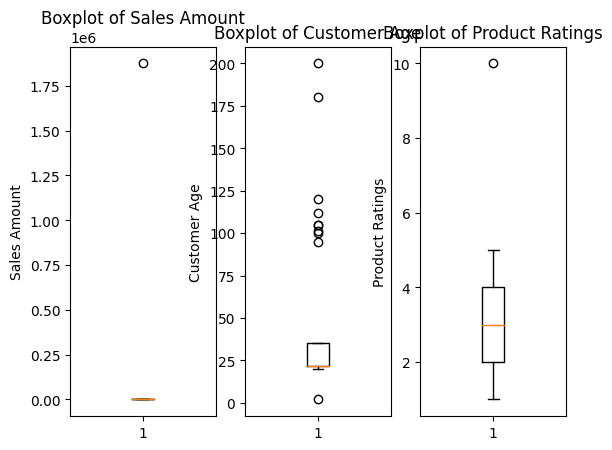

In [ ]:
#outliers

df1.describe() #indication for outliers
#SalesDate normal range
# potential outliers SalesAmount,CustomerAge,ProductRatings

#boxplots for confirmation of outliers
plt.subplot(1, 3, 1)
plt.boxplot(df1['SalesAmount'])
plt.title('Boxplot of Sales Amount')
plt.ylabel('Sales Amount')

plt.subplot(1, 3, 2)
plt.boxplot(df1['CustomerAge'])
plt.title('Boxplot of Customer Age')
plt.ylabel('Customer Age')

plt.subplot(1, 3, 3)
plt.boxplot(df1['ProductRatings'])
plt.title('Boxplot of Product Ratings')
plt.ylabel('Product Ratings')


1
   SalesDate ProductCategory  SalesAmount  CustomerAge CustomerGender  \
9 2023-12-04        Clothing         1875           35         Female   

  CustomerLocation  ProductRatings  
9               UK              10  
0
9
     SalesDate  ProductCategory  SalesAmount  CustomerAge CustomerGender  \
338 2023-12-23      Electronics         1187          200           Male   
497 2023-03-23         Clothing          779           95         Female   
514 2023-09-22         Clothing          212          112           Male   
564 2022-12-06         Clothing          939          100           Male   
697 2022-09-24      Electronics          173          101         Female   
701 2023-04-28      Electronics         1621          180           Male   
707 2023-07-06      Electronics         1547          105           Male   
771 2022-03-30  Home Appliances          785          120         Female   
782 2022-02-12      Electronics         1709          105           Male   

    Customer

Text(0, 0.5, 'Product Ratings')

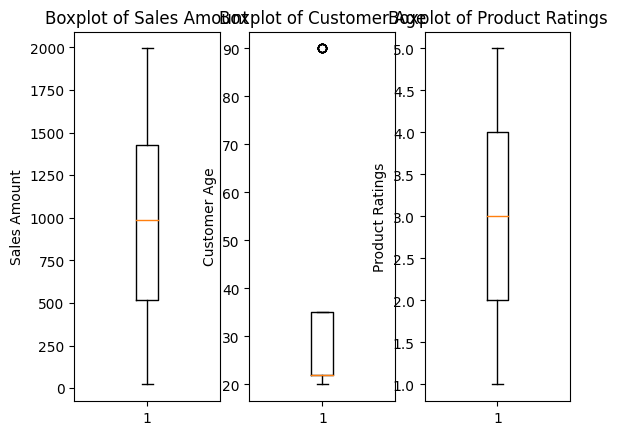

In [ ]:
#ProductRatings
rating_over_5 = df1[df1['ProductRatings'] > 5]
count_invalid_ratings = len(rating_over_5)
print(count_invalid_ratings)
print(rating_over_5)
#CustomerLocation  ProductRatings
#9               UK              10
#handle ProductRatings outlier
df1.loc[df1['ProductRatings'] > 5, 'ProductRatings'] = 5
#check
rating_over_5 = df1[df1['ProductRatings'] > 5]
count_invalid_ratings = len(rating_over_5)
print(count_invalid_ratings)
#0

#CustomerAge
Age_over_90 = df1[df1['CustomerAge'] >90]
count_invalid_ratings = len(Age_over_90)
print(count_invalid_ratings)
print(Age_over_90)
#9

#handle CustomerAge outliers
df1.loc[df1['CustomerAge'] > 90, 'CustomerAge'] = 90
median_customer_age = df1['CustomerAge'].median()
df1.loc[df1['CustomerAge'] < 5, 'CustomerAge'] = median_customer_age

#check
CustomerAge_over_90 = df1[df1['CustomerAge'] > 90]
count_invalid_ratings_C=len(CustomerAge_over_90)
print(count_invalid_ratings_C)
#0

#SalesAmount
#Detect any records where the SalesAmount is significantly higher or lower than the average
z_scores = (df1['SalesAmount'] - df1['SalesAmount'].mean()) / df1['SalesAmount'].std()
threshold = 3
outlier_detection = df1[abs(z_scores) > threshold]
print(outlier_detection)
print(outlier_detection.index)
print(outlier_detection.count())
#handle outliers for SalesAmount
median_sales_amount = df1['SalesAmount'].median()
df1.loc[abs(z_scores) > threshold, 'SalesAmount'] = median_sales_amount

plt.subplot(1, 3, 1)
plt.boxplot(df1['SalesAmount'])
plt.title('Boxplot of Sales Amount')
plt.ylabel('Sales Amount')

plt.subplot(1, 3, 2)
plt.boxplot(df1['CustomerAge'])
plt.title('Boxplot of Customer Age')
plt.ylabel('Customer Age')

plt.subplot(1, 3, 3)
plt.boxplot(df1['ProductRatings'])
plt.title('Boxplot of Product Ratings')
plt.ylabel('Product Ratings')


In [ ]:
grouped16 = df1.groupby('CustomerGender').agg({'CustomerGender': 'count'})
print(grouped16)

                CustomerGender
CustomerGender                
Did not answer               1
Female                     484
Male                       488
Non-binary                   4
Unknown                     23


Reform CustomerGender variable

In [ ]:
# Replace 'Did not answer', 'Non-binary', and 'Unknown' with 'Unknown'
df1['CustomerGender'] = df1['CustomerGender'].replace(['Did not answer', 'Non-binary', 'Unknown'], 'Unknown')

# Group by CustomerGender and count occurrences
grouped16 = df1.groupby('CustomerGender').size().reset_index(name='Count')

print(grouped16)


  CustomerGender  Count
0         Female    484
1           Male    488
2        Unknown     28


Descriptive Statistics-Agreggations

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SalesDate         1000 non-null   datetime64[ns]
 1   ProductCategory   1000 non-null   object        
 2   SalesAmount       1000 non-null   Int64         
 3   CustomerAge       1000 non-null   int64         
 4   CustomerGender    1000 non-null   object        
 5   CustomerLocation  1000 non-null   object        
 6   ProductRatings    1000 non-null   Int64         
dtypes: Int64(2), datetime64[ns](1), int64(1), object(3)
memory usage: 56.8+ KB


In [ ]:
df1.describe()


,SalesAmount,CustomerAge,ProductRatings
count,1000.0,1000.000000,1000.0
mean,982.205,28.889000,2.962
std,536.690094,8.710025,1.387256
min,22.0,20.000000,1.0
25%,520.0,22.000000,2.0
50%,987.0,22.000000,3.0
75%,1428.0,35.000000,4.0
max,1994.0,90.000000,5.0


In [ ]:
df1.describe(include='object')

,ProductCategory,CustomerGender,CustomerLocation
count,1000,1000,1000
unique,3,3,6
top,Electronics,Male,USA
freq,357,488,209


In [ ]:
grouped1 = df1.groupby('CustomerLocation').agg({'CustomerLocation': 'count', 'SalesAmount': 'sum'})
print(grouped1)

                  CustomerLocation  SalesAmount
CustomerLocation                               
Australia                      113       104479
Canada                         201       186563
India                          167       179374
Japan                          107        96893
UK                             203       208310
USA                            209       206586


In [ ]:
grouped12 = df1.groupby('CustomerLocation').agg({'CustomerLocation': 'count', 'SalesAmount': 'sum', 'CustomerAge' : 'mean'})
print(grouped12)

                  CustomerLocation  SalesAmount  CustomerAge
CustomerLocation                                            
Australia                      113       104479    27.867257
Canada                         201       186563    29.487562
India                          167       179374    28.556886
Japan                          107        96893    29.074766
UK                             203       208310    29.458128
USA                            209       206586    28.483254


In [ ]:
grouped1 = df1.groupby('CustomerLocation').agg({'CustomerLocation': 'count', 'SalesAmount': 'sum'})

# Calculate the percentage for 'count'
count_percentage = (grouped1['CustomerLocation'] / len(df1)) * 100

# Calculate the percentage for 'sum'
sum_percentage = (grouped1['SalesAmount'] / grouped1['SalesAmount'].sum()) * 100

# Create a new DataFrame with the percentages
grouped1_percentage = pd.DataFrame({'CountPercentage': count_percentage, 'SumPercentage': sum_percentage})

print(grouped1_percentage)

                  CountPercentage  SumPercentage
CustomerLocation                                
Australia                    11.3      10.637189
Canada                       20.1      18.994304
India                        16.7      18.262379
Japan                        10.7       9.864845
UK                           20.3      21.208404
USA                          20.9       21.03288


In [ ]:
grouped2 = df1.groupby(['CustomerLocation', 'ProductCategory'])[['SalesAmount', 'ProductRatings']].agg({'SalesAmount': 'sum', 'ProductRatings': 'mean'})
print(grouped2)

                                  SalesAmount  ProductRatings
CustomerLocation ProductCategory                             
Australia        Clothing               29858        2.763158
                 Electronics            45468        2.978261
                 Home Appliances        29153        3.068966
Canada           Clothing               55268        3.301587
                 Electronics            71618        2.927536
                 Home Appliances        59677        3.130435
India            Clothing               68311        2.883333
                 Electronics            61060        2.683333
                 Home Appliances        50003        3.021277
Japan            Clothing               27272        2.666667
                 Electronics            35142        2.891892
                 Home Appliances        34479        3.058824
UK               Clothing               66415        2.833333
                 Electronics            69207        2.726027
        

In [ ]:
grouped2.to_excel('grouped2.xls', index=True, engine='openpyxl')



In [ ]:
grouped21 = df1.groupby(['CustomerLocation', 'ProductCategory'])[['SalesAmount', 'ProductRatings','CustomerAge']].agg({'SalesAmount': 'sum', 'ProductRatings': 'mean','CustomerAge': 'mean'})
print(grouped21)

                                  SalesAmount  ProductRatings  CustomerAge
CustomerLocation ProductCategory                                          
Australia        Clothing               29858        2.763158    27.815789
                 Electronics            45468        2.978261    27.086957
                 Home Appliances        29153        3.068966    29.172414
Canada           Clothing               55268        3.301587    29.063492
                 Electronics            71618        2.927536    30.768116
                 Home Appliances        59677        3.130435    28.594203
India            Clothing               68311        2.883333    28.500000
                 Electronics            61060        2.683333    28.766667
                 Home Appliances        50003        3.021277    28.361702
Japan            Clothing               27272        2.666667    28.944444
                 Electronics            35142        2.891892    29.729730
                 Home App

In [ ]:
grouped21.to_excel('grouped2.xls', index=True, engine='openpyxl')

In [ ]:
grouped22 = df1.groupby(['CustomerLocation', 'ProductCategory','CustomerGender'])[['SalesAmount', 'ProductRatings','CustomerAge']].agg({'SalesAmount': 'sum', 'ProductRatings': 'mean','CustomerAge': 'mean'})
print(grouped22)

In [ ]:
grouped22.to_excel('grouped22.xls', index=True, engine='openpyxl')

Create new variable QuarterSales

In [ ]:


df1['SalesDate'] = pd.to_datetime(df1['SalesDate'])

# Create a new variable QuarterSales
df1['QuarterSales'] = df1['SalesDate'].dt.to_period("Q")

# Display the updated DataFrame
print(df1[['SalesDate', 'QuarterSales']])


     SalesDate QuarterSales
0   2023-10-15       2023Q4
1   2023-09-16       2023Q3
2   2022-09-06       2022Q3
3   2023-02-24       2023Q1
4   2022-09-24       2022Q3
..         ...          ...
995 2023-12-02       2023Q4
996 2023-02-02       2023Q1
997 2023-07-30       2023Q3
998 2023-01-05       2023Q1
999 2022-11-18       2022Q4

[1000 rows x 2 columns]


In [ ]:
grouped3 = df1.groupby(['QuarterSales','CustomerLocation', 'ProductCategory'])[['SalesAmount', 'ProductRatings']].agg({'SalesAmount': 'sum', 'ProductRatings': 'mean'})
print(grouped3)

                                               SalesAmount  ProductRatings
QuarterSales CustomerLocation ProductCategory                             
2022Q1       Australia        Clothing                1653             3.0
                              Electronics             8680        3.454545
                              Home Appliances         4490             3.5
             Canada           Clothing                5790        3.142857
                              Electronics             8035            3.75
...                                                    ...             ...
2023Q4       UK               Electronics            14161        2.666667
                              Home Appliances         4376             3.0
             USA              Clothing               14974             3.4
                              Electronics             6942             3.2
                              Home Appliances        12283            2.75

[144 rows x 2 columns]


Examine USA market

In [ ]:
grouped3_usa = grouped3[grouped3.index.get_level_values('CustomerLocation') == 'USA']

print(grouped3_usa)

                                               SalesAmount  ProductRatings
QuarterSales CustomerLocation ProductCategory                             
2022Q1       USA              Clothing               16535             4.0
                              Electronics             6631             3.5
                              Home Appliances         9257             3.3
2022Q2       USA              Clothing                8160             3.0
                              Electronics             2917            1.75
                              Home Appliances         3758        1.833333
2022Q3       USA              Clothing                5308             3.0
                              Electronics             7521             3.0
                              Home Appliances         5299        2.166667
2022Q4       USA              Clothing                6676        2.285714
                              Electronics            10362        2.555556
                         

In [ ]:
grouped3_usa.to_excel('grouped3_usa.xls', index=True, engine='openpyxl')




In [ ]:
grouped4 = df1.groupby(['QuarterSales','CustomerLocation', 'ProductCategory','CustomerGender'])[['SalesAmount', 'CustomerAge','ProductRatings']].agg({'SalesAmount': 'sum','CustomerAge': 'mean','ProductRatings': 'mean'})
grouped4_usa = grouped4[grouped4.index.get_level_values('CustomerLocation') == 'USA']

print(grouped4_usa)

Data Visualization

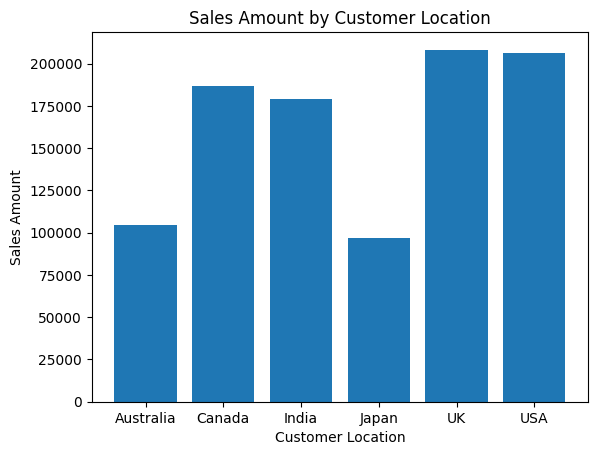

In [ ]:
#visualization
plt.bar(grouped1.index, grouped1['SalesAmount'])
plt.xlabel('Customer Location')
plt.ylabel('Sales Amount')
plt.title('Sales Amount by Customer Location')
plt.show()

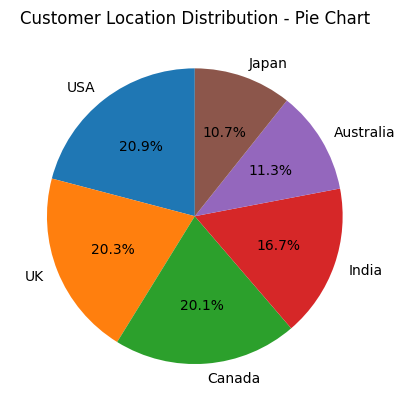

In [ ]:
count_percentage = df1['CustomerLocation'].value_counts(normalize=True) * 100
grouped1_percentage = pd.DataFrame({'CountPercentage': count_percentage})
plt.pie(grouped1_percentage['CountPercentage'], labels=grouped1_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Location Distribution - Pie Chart')
plt.show()

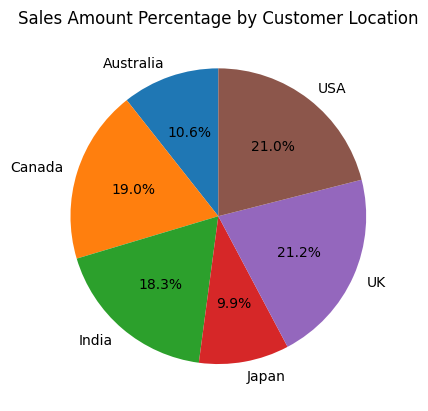

In [ ]:

grouped1_percentage = pd.DataFrame({'CountPercentage': count_percentage, 'SumPercentage': sum_percentage})
plt.pie(grouped1_percentage['SumPercentage'], labels=grouped1_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Amount Percentage by Customer Location')
plt.show()

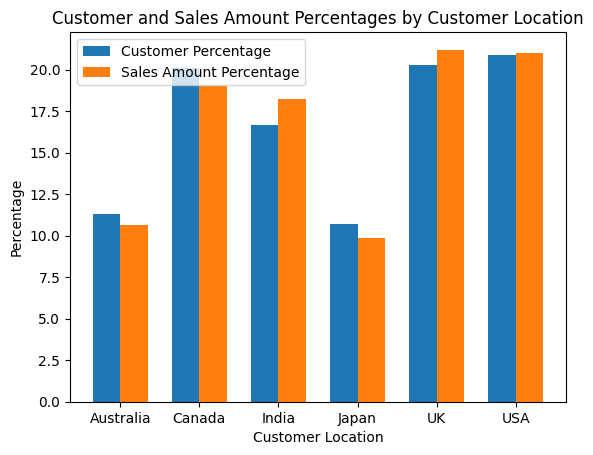

In [ ]:


customer_percentage = (grouped1['CustomerLocation'] / len(df1)) * 100
sales_amount_percentage = (grouped1['SalesAmount'] / grouped1['SalesAmount'].sum()) * 100

# Create a new DataFrame with the percentages
grouped1_percentage = pd.DataFrame({'CustomerPercentage': customer_percentage, 'SalesAmountPercentage': sales_amount_percentage})

# Plotting the grouped bar chart
width = 0.35  # width of the bars
locations = range(len(grouped1_percentage))

fig, ax = plt.subplots()
bar1 = ax.bar(locations, grouped1_percentage['CustomerPercentage'], width, label='Customer Percentage')
bar2 = ax.bar([i + width for i in locations], grouped1_percentage['SalesAmountPercentage'], width, label='Sales Amount Percentage')

# Adding labels and title
ax.set_xlabel('Customer Location')
ax.set_ylabel('Percentage')
ax.set_title('Customer and Sales Amount Percentages by Customer Location')

# Adding x-axis labels and legend
ax.set_xticks([i + width/2 for i in locations])
ax.set_xticklabels(grouped1_percentage.index)
ax.legend()

# Display the plot
plt.show()

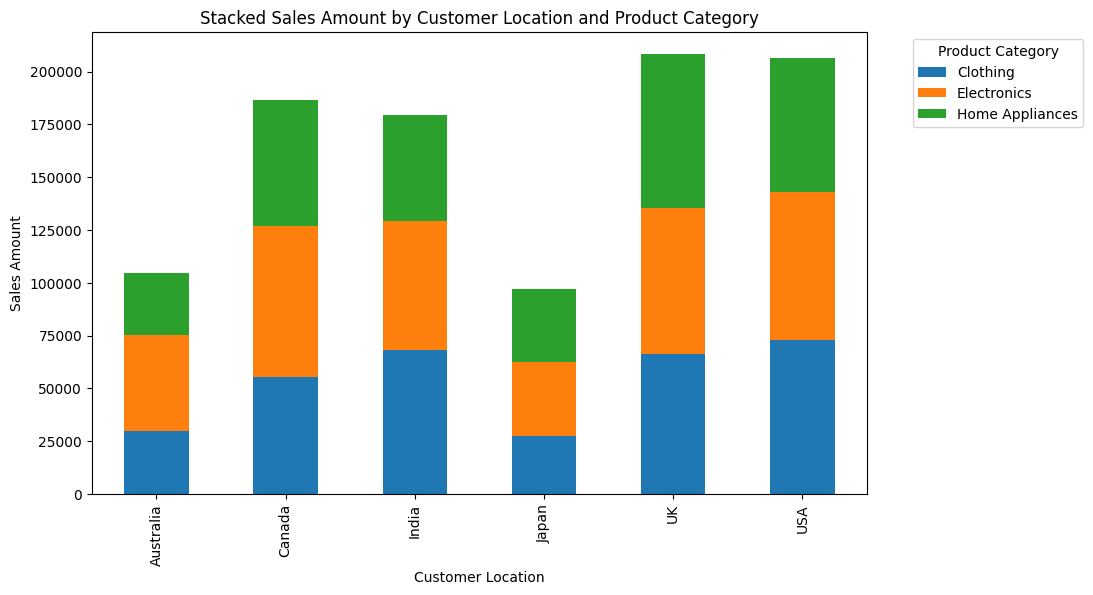

In [ ]:
pivot_table = grouped2.pivot_table(index='CustomerLocation', columns='ProductCategory', values='SalesAmount', fill_value=0)

# Plotting the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Customer Location')
plt.ylabel('Sales Amount')
plt.title('Stacked Sales Amount by Customer Location and Product Category')

# Adding legend
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

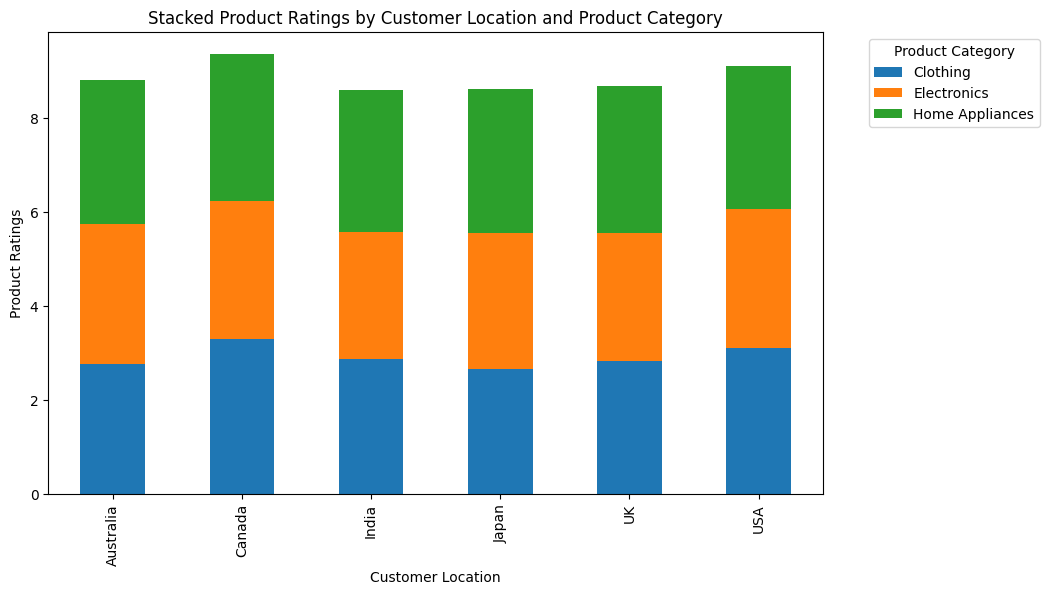

In [ ]:
pivot_table_ratings = grouped2.pivot_table(index='CustomerLocation', columns='ProductCategory', values='ProductRatings', fill_value=0)

# Plotting the stacked bar chart
pivot_table_ratings.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Customer Location')
plt.ylabel('Product Ratings')
plt.title('Stacked Product Ratings by Customer Location and Product Category')

# Adding legend
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

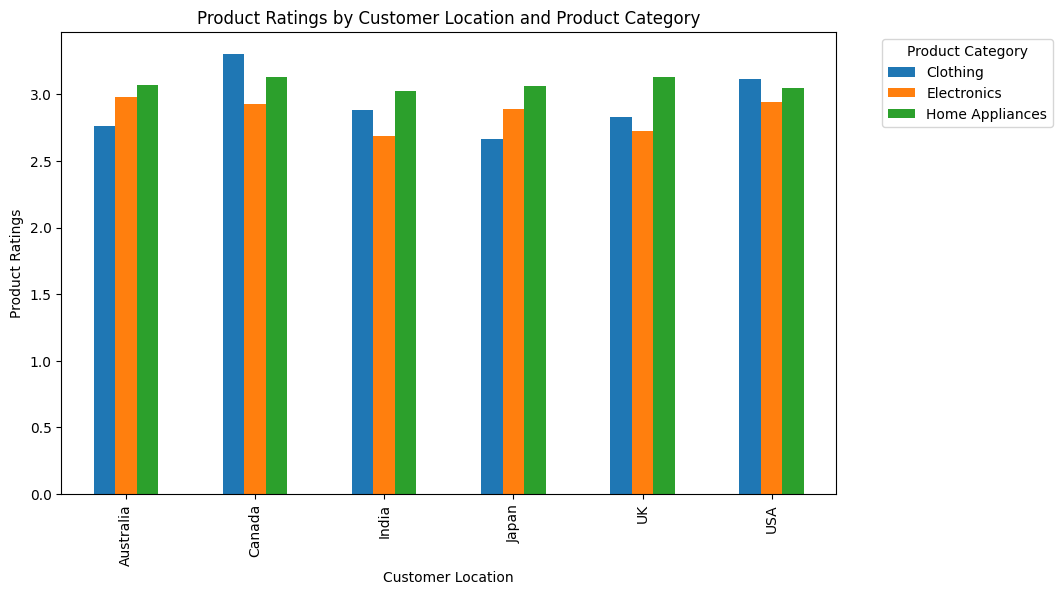

In [ ]:
pivot_table_ratings = grouped2.pivot_table(index=['CustomerLocation'], columns='ProductCategory', values='ProductRatings', fill_value=0)

# Plotting the grouped bar chart
pivot_table_ratings.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Customer Location')
plt.ylabel('Product Ratings')
plt.title('Product Ratings by Customer Location and Product Category')

# Adding legend
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [ ]:
!pip install plotnine
from plotnine import ggplot, aes, geom_density, labs


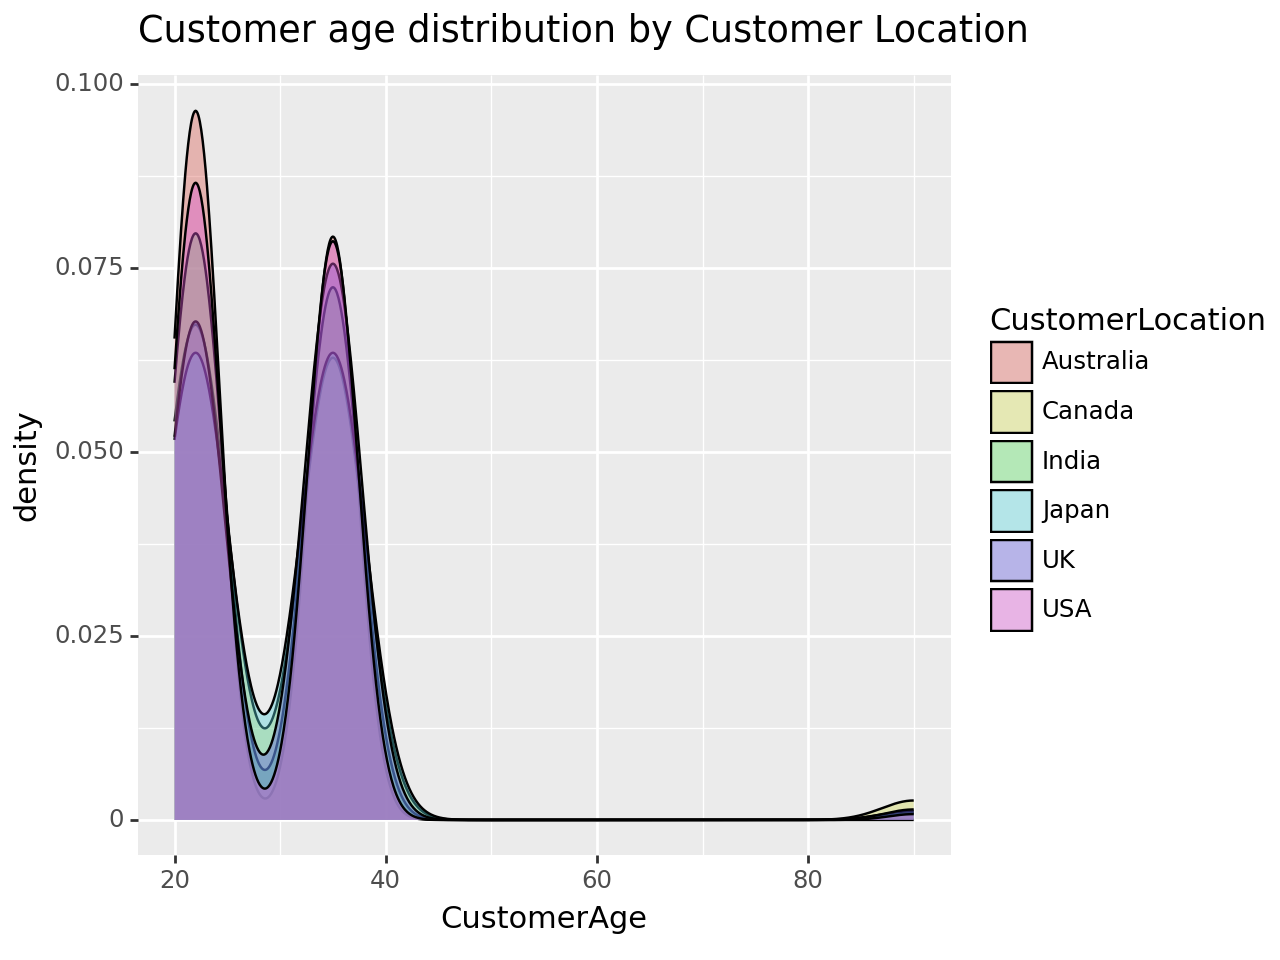

In [ ]:
from plotnine import ggplot, aes, geom_density, labs

p = ggplot(df1, aes(x='CustomerAge', fill='CustomerLocation')) + \
    geom_density(alpha=0.4) + \
    labs(title="Customer age distribution by Customer Location")

print(p)

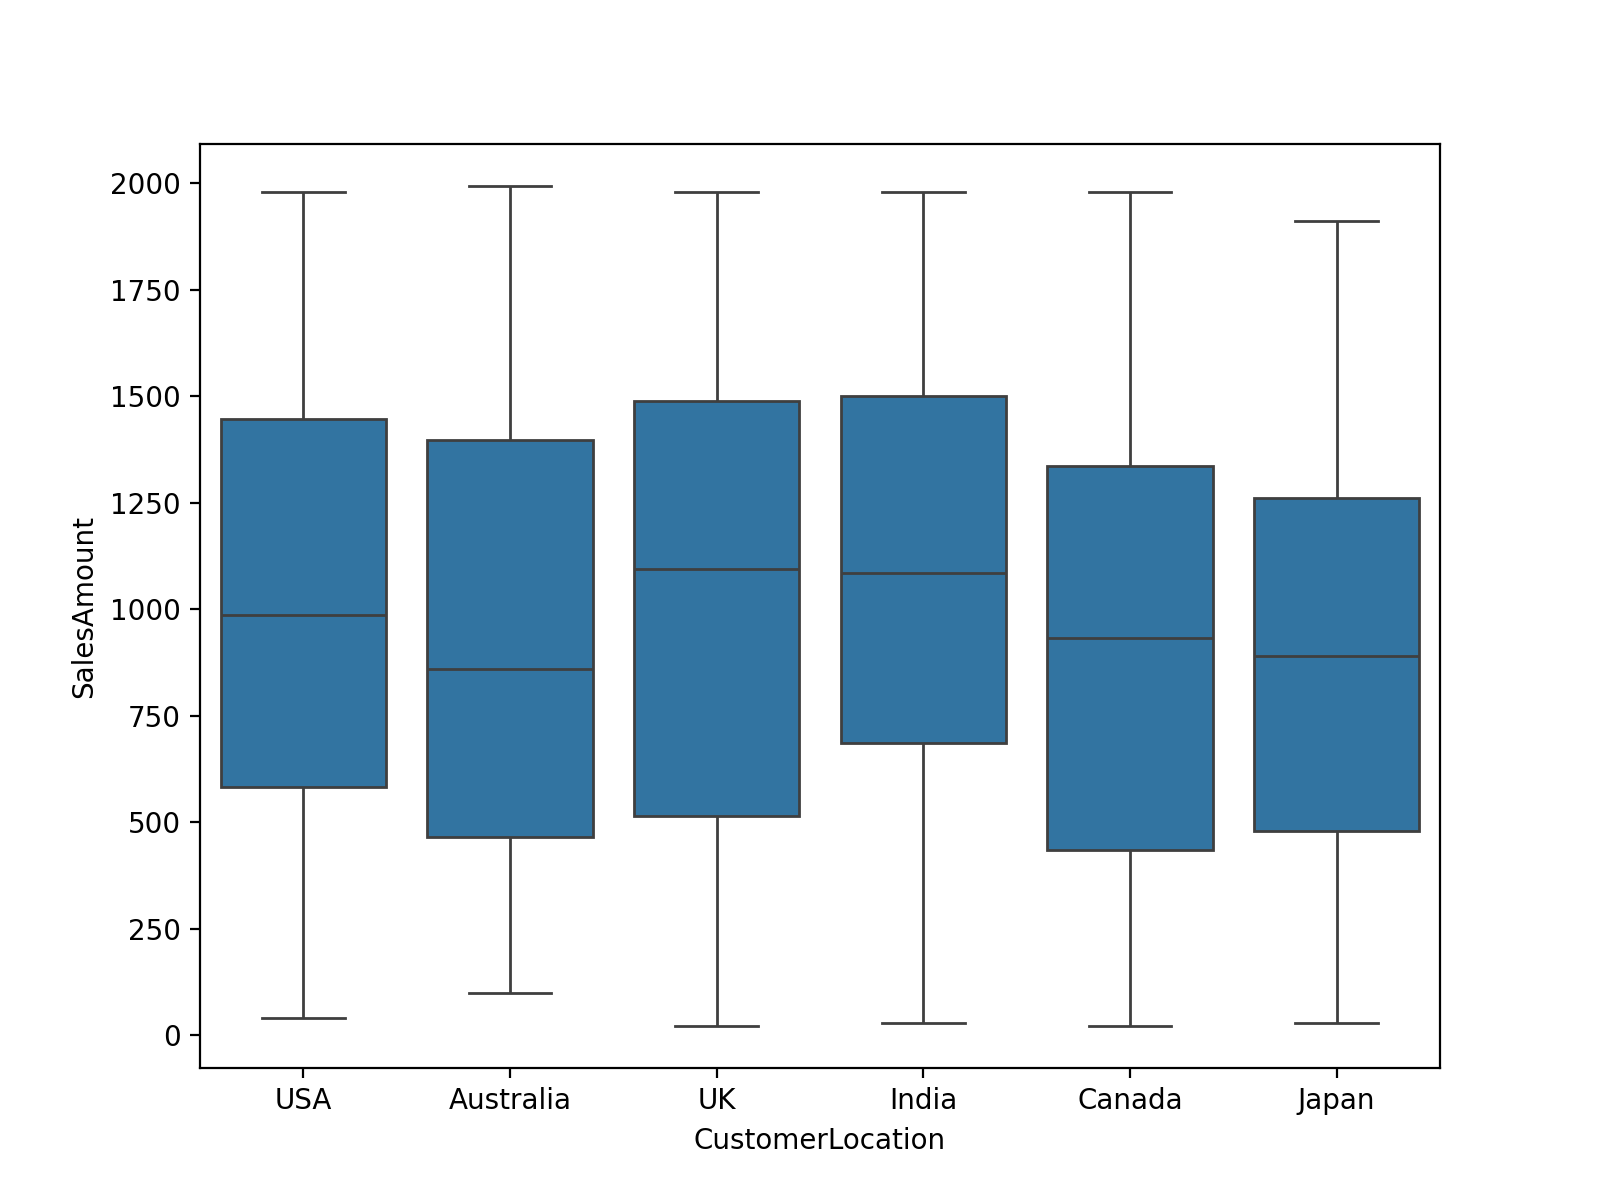

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CustomerLocation', y='SalesAmount', data=df1)
plt.show()

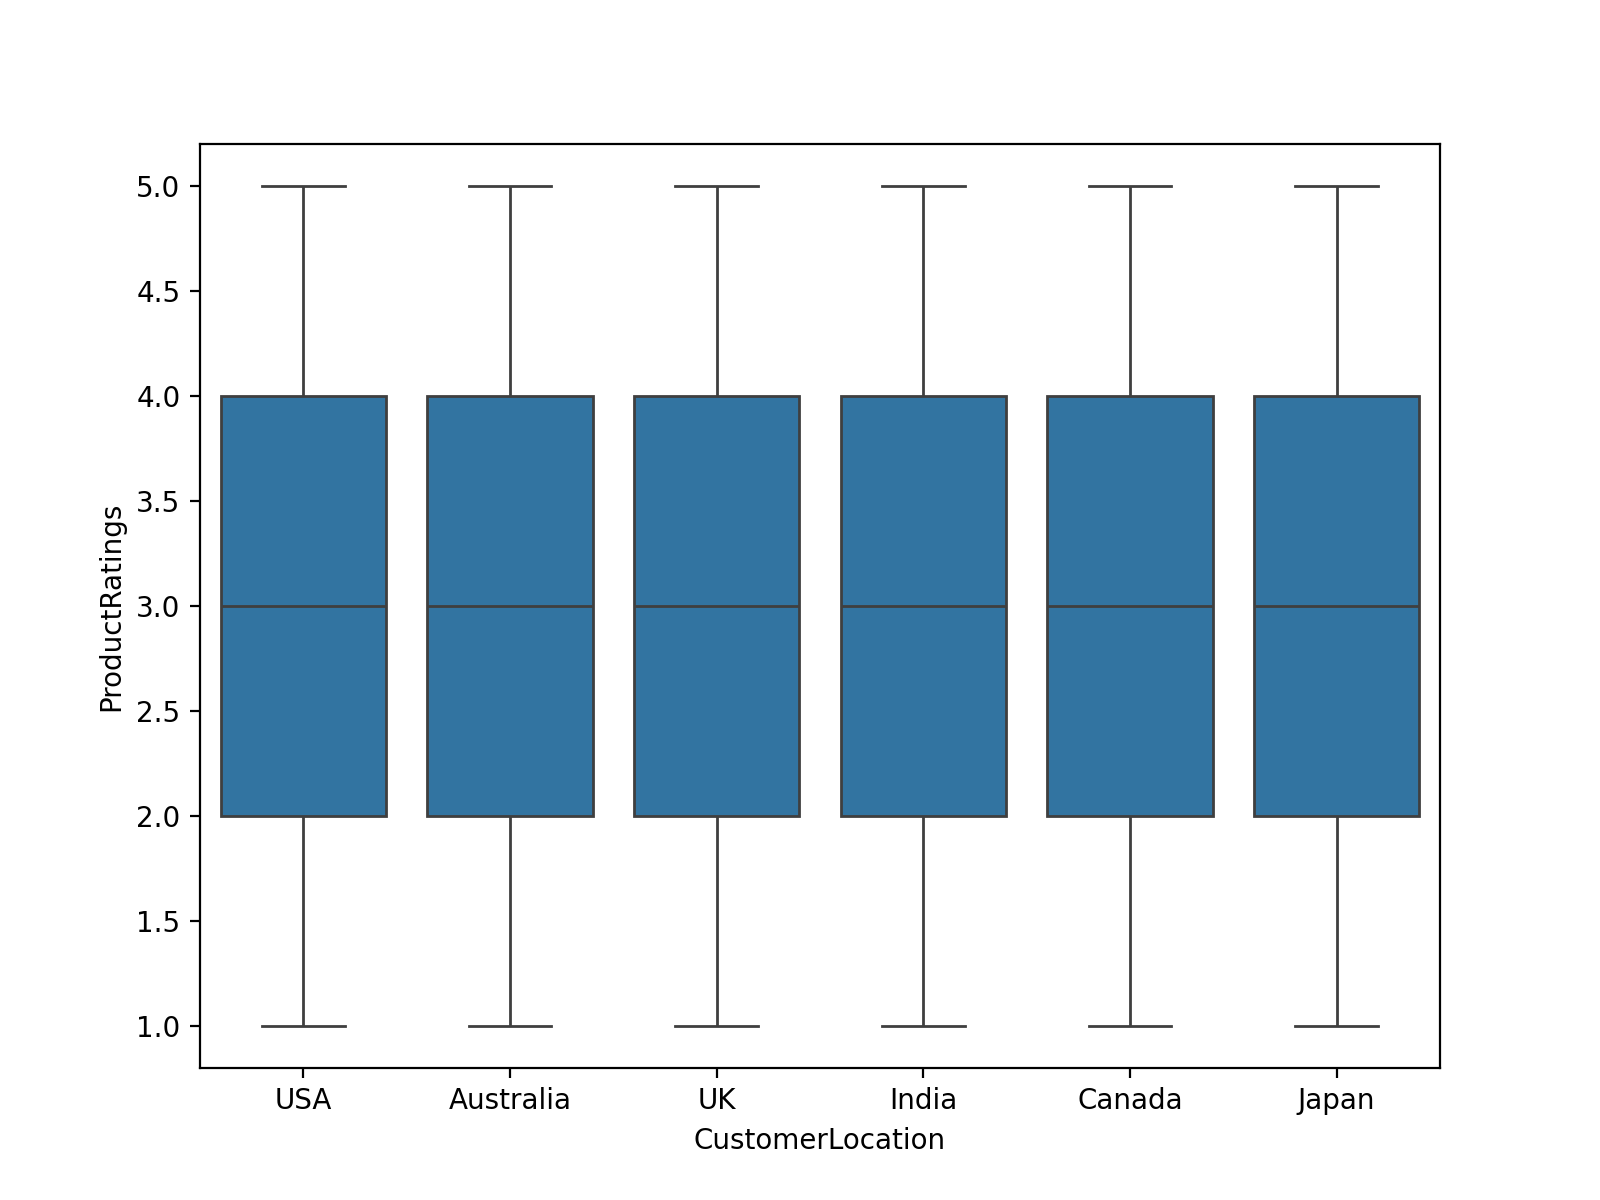

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CustomerLocation', y='ProductRatings', data=df1)
plt.show()

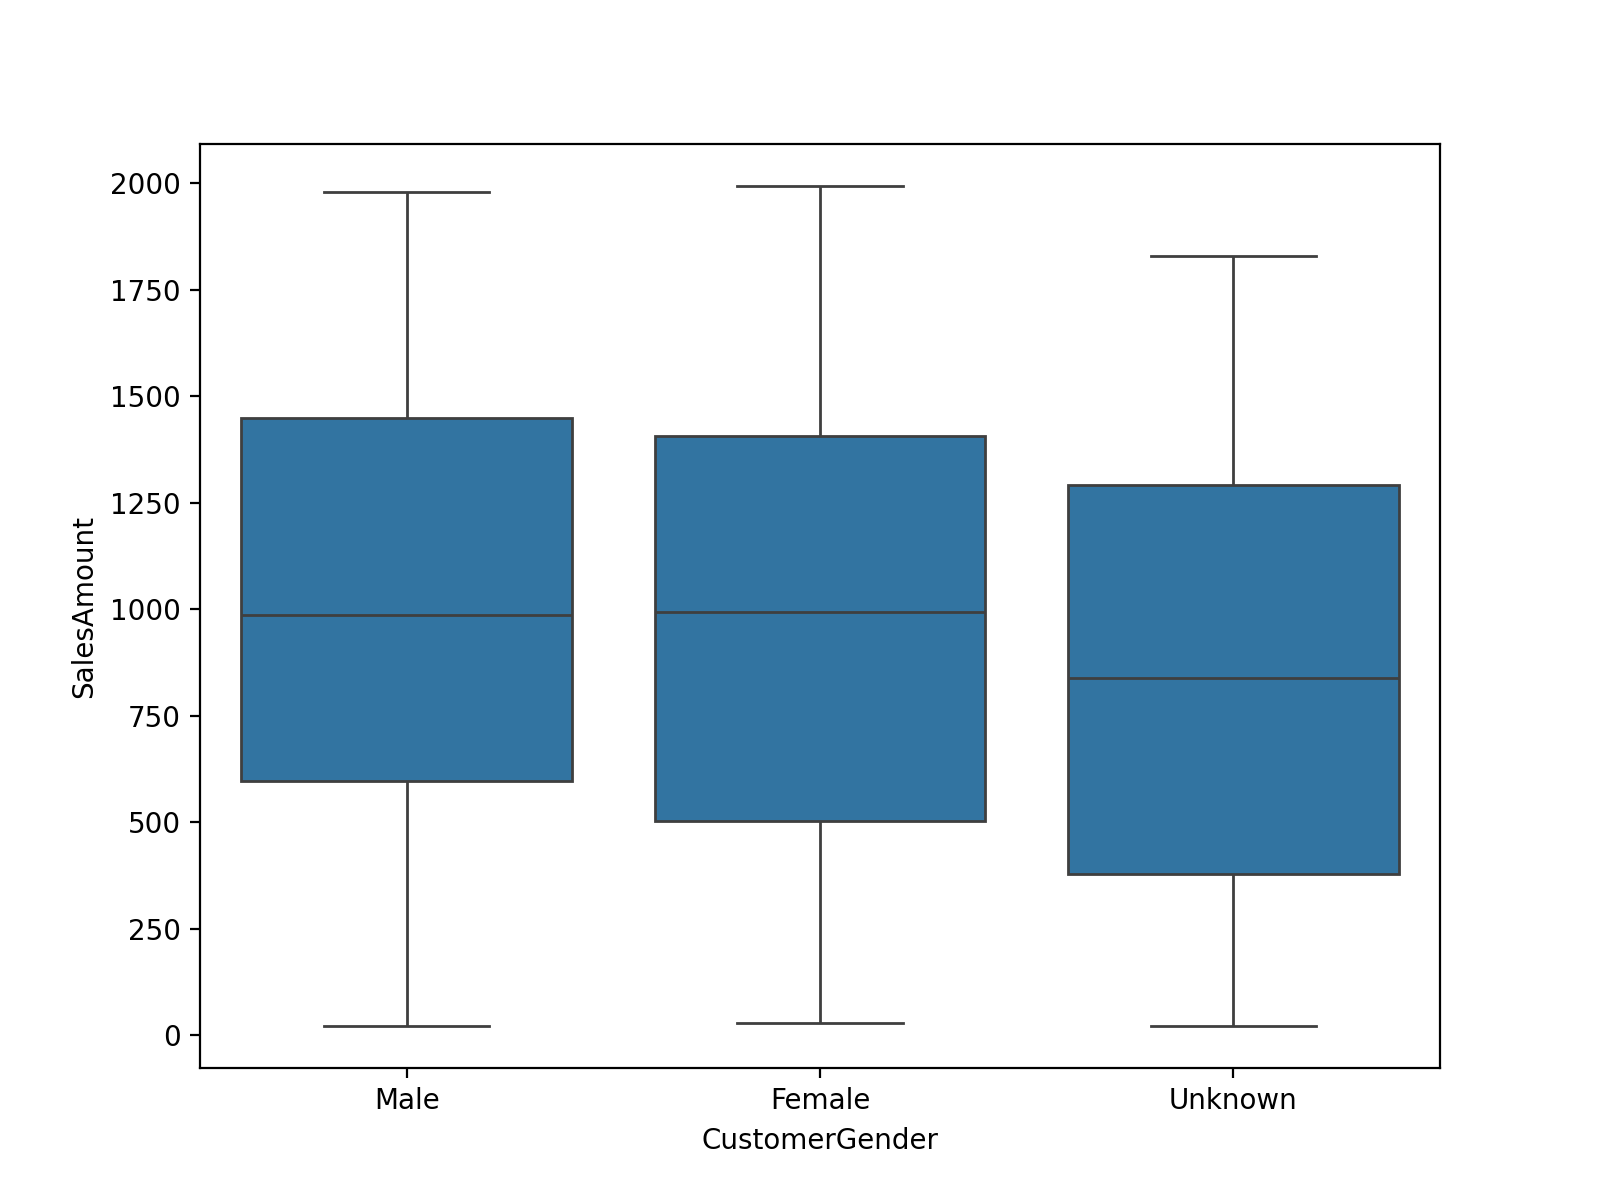

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CustomerGender', y='SalesAmount', data=df1)
plt.show()

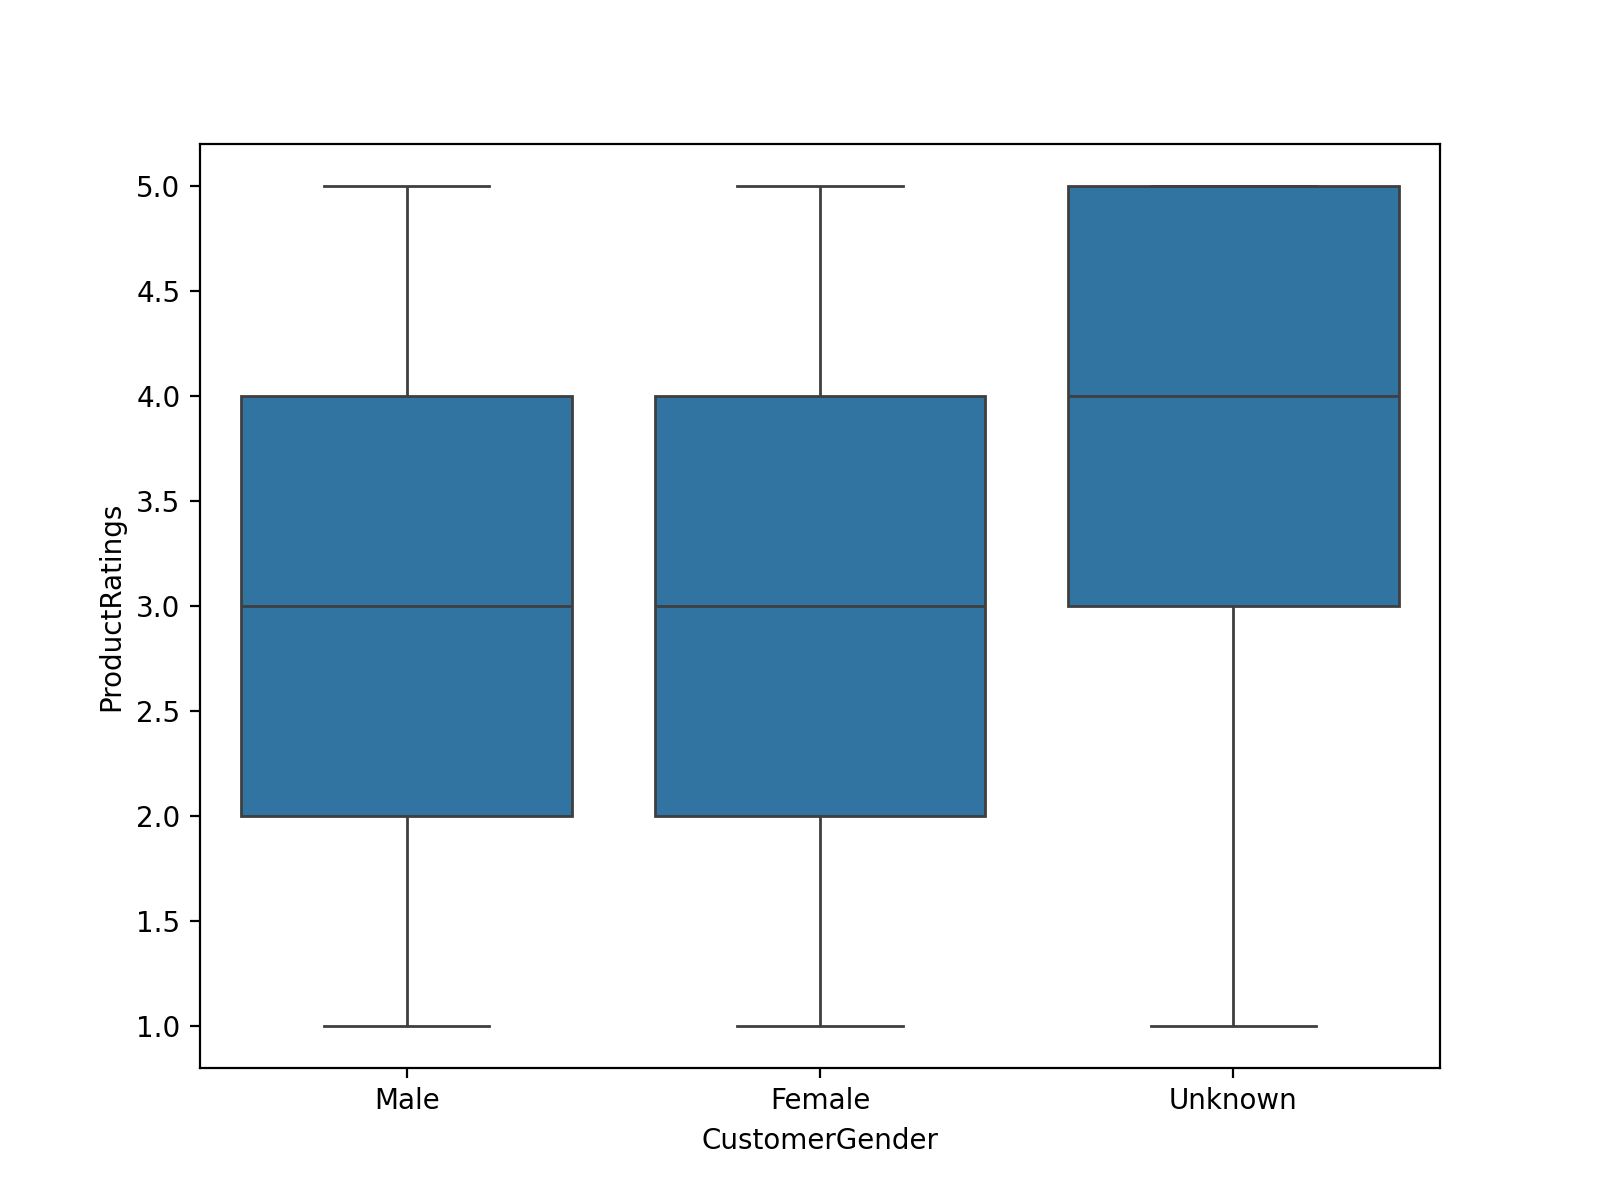

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CustomerGender', y='ProductRatings', data=df1)
plt.show()

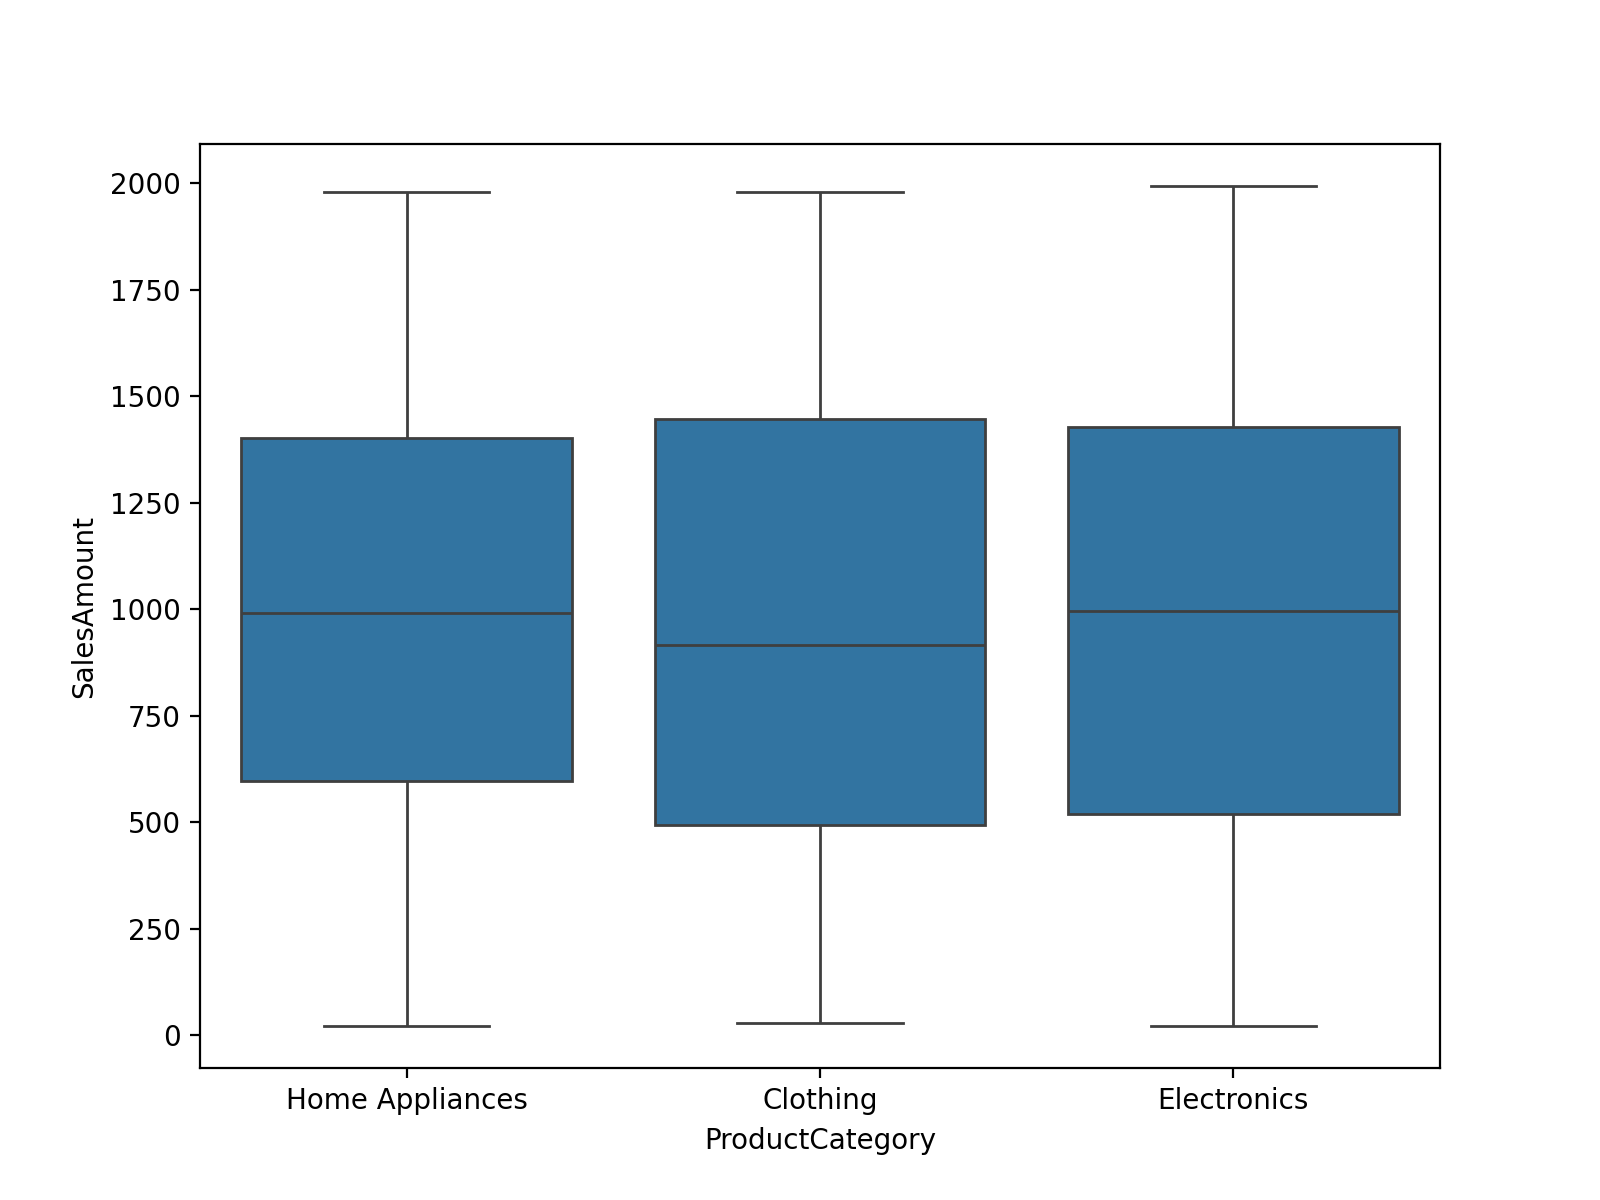

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ProductCategory', y='SalesAmount', data=df1)
plt.show()

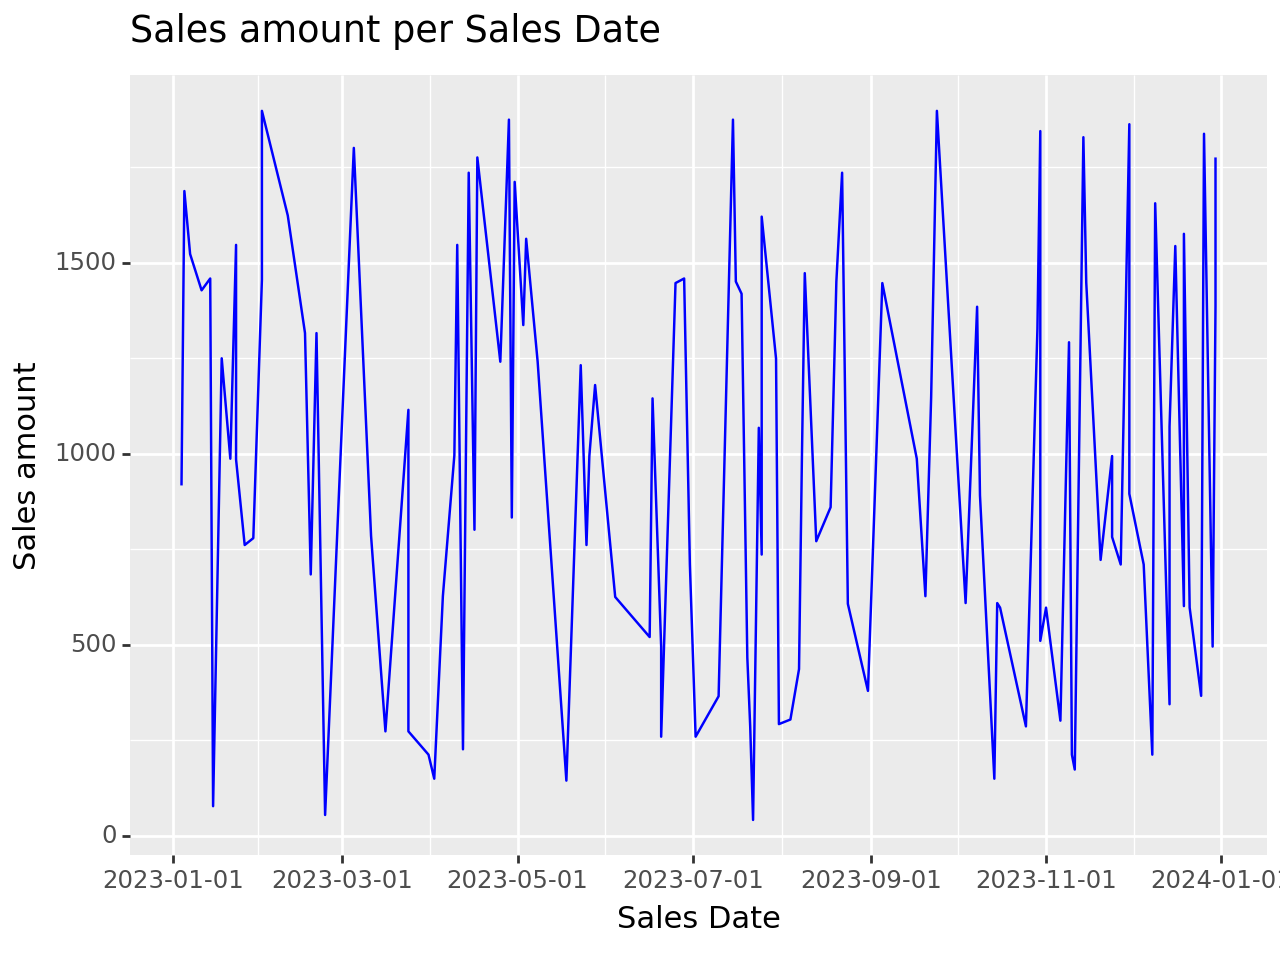

In [ ]:

#sales amount for 2023
df1_usa = df1[(df1['CustomerLocation'] == 'USA') & (df1['SalesDate'] >= '2023-01-01') & (df1['SalesDate'] <= '2024-01-01')]

from plotnine import ggplot, aes, geom_line, labs

p = ggplot(df1_usa, aes(x='SalesDate', y='SalesAmount')) + \
    geom_line(color="blue") + \
    labs(title="Sales amount per Sales Date", x="Sales Date", y="Sales amount")

print(p)

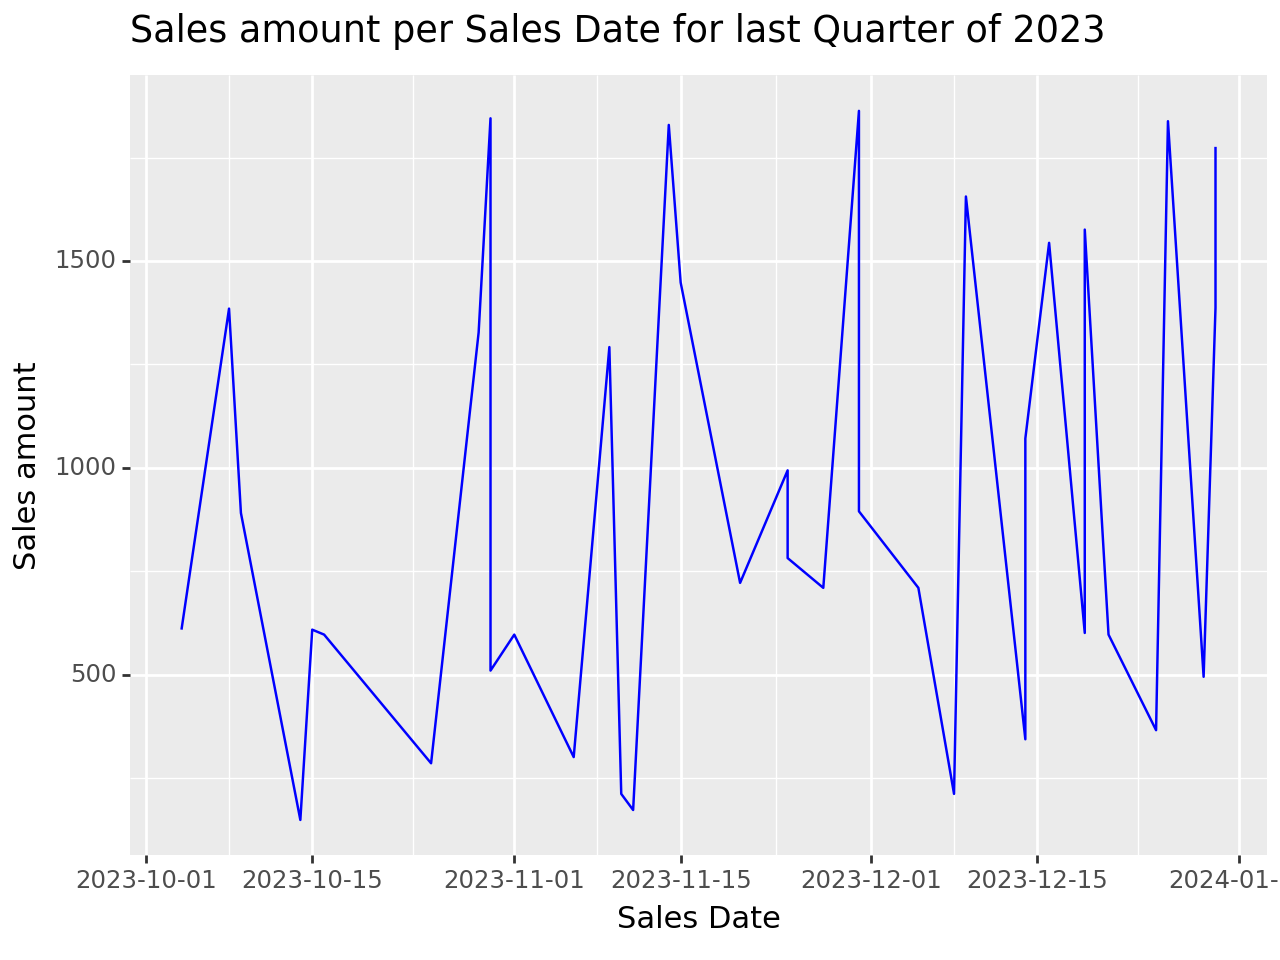

In [ ]:
# Filter the data for the last quarter of 2023 for USA
df1_usa_Q4 = df1[(df1['CustomerLocation'] == 'USA') & (df1['SalesDate'].dt.to_period('Q') == '2023Q4')]

from plotnine import ggplot, aes, geom_line, labs

# Create the plot
p = ggplot(df1_usa_Q4, aes(x='SalesDate', y='SalesAmount')) + \
    geom_line(color="blue") + \
    labs(title="Sales amount per Sales Date for last Quarter of 2023", x="Sales Date", y="Sales amount")


print(p)

**Inferential Statistics**


In [ ]:
grouped5 = df1.groupby('CustomerLocation').agg({'CustomerLocation': 'count', 'SalesAmount': 'mean'})
print(grouped5)

                  CustomerLocation  SalesAmount
CustomerLocation                               
Australia                      113    924.59292
Canada                         201   928.174129
India                          167  1074.095808
Japan                          107   905.542056
UK                             203  1026.157635
USA                            209   988.449761


In [ ]:
grouped6 = df1.groupby('ProductCategory').agg({'ProductCategory': 'count', 'SalesAmount': 'mean'})
print(grouped6)

                 ProductCategory  SalesAmount
ProductCategory                              
Clothing                     327   978.883792
Electronics                  357   987.966387
Home Appliances              316   979.132911


**Independent t-tests to compare the mean of SalelesAmount per each pair of product category**

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Convert 'SalesAmount' column to numeric data type
df1['SalesAmount'] = pd.to_numeric(df1['SalesAmount'], errors='coerce').astype(float)

# Filter sales amounts for each product category
clothing_sales = df1[df1['ProductCategory'] == 'Clothing']['SalesAmount']
electronics_sales = df1[df1['ProductCategory'] == 'Electronics']['SalesAmount']
home_appliances_sales = df1[df1['ProductCategory'] == 'Home Appliances']['SalesAmount']

# Perform independent samples t-tests
# Clothing vs. Electronics
t_stat_ce, p_val_ce = ttest_ind(clothing_sales.dropna(), electronics_sales.dropna(), equal_var=False)

# Clothing vs. Home Appliances
t_stat_cha, p_val_cha = ttest_ind(clothing_sales.dropna(), home_appliances_sales.dropna(), equal_var=False)

# Electronics vs. Home Appliances
t_stat_eha, p_val_eha = ttest_ind(electronics_sales.dropna(), home_appliances_sales.dropna(), equal_var=False)

# Print the results
print("Clothing vs. Electronics:")
print("   t-statistic:", t_stat_ce)
print("   p-value:", p_val_ce)

print("\nClothing vs. Home Appliances:")
print("   t-statistic:", t_stat_cha)
print("   p-value:", p_val_cha)

print("\nElectronics vs. Home Appliances:")
print("   t-statistic:", t_stat_eha)
print("   p-value:", p_val_eha)


Clothing vs. Electronics:
   t-statistic: -0.21783559431814062
   p-value: 0.8276233534933012

Clothing vs. Home Appliances:
   t-statistic: -0.005868971612301685
   p-value: 0.9953190921028101

Electronics vs. Home Appliances:
   t-statistic: 0.2165036644369266
   p-value: 0.828661622258992


**Independent t-tests to compare the mean of SalelesAmount per each pair of Costumer Location**

In [ ]:
from scipy.stats import ttest_ind

# List of unique customer locations
customer_locations = ['USA', 'Australia', 'UK', 'India', 'Canada', 'Japan']

# Perform independent samples t-tests for each customer location
for loc in customer_locations:
    # Filter sales amounts for the current customer location
    sales_loc = df1[df1['CustomerLocation'] == loc]['SalesAmount']

    # Perform t-tests against all other customer locations
    for other_loc in customer_locations:
        if other_loc != loc:
            # Filter sales amounts for the other customer location
            other_sales_loc = df1[df1['CustomerLocation'] == other_loc]['SalesAmount']

            # Perform t-test
            t_stat, p_val = ttest_ind(sales_loc.dropna(), other_sales_loc.dropna(), equal_var=False)

            # Print results
            print(f"{loc} vs. {other_loc}:")
            print("   t-statistic:", t_stat)
            print("   p-value:", p_val)
            print()


USA vs. Australia:
   t-statistic: 1.042825193499052
   p-value: 0.29810420723067665

USA vs. UK:
   t-statistic: -0.6915811438757994
   p-value: 0.48959596251987814

USA vs. India:
   t-statistic: -1.574865348648549
   p-value: 0.11616582585185661

USA vs. Canada:
   t-statistic: 1.1480544220923667
   p-value: 0.25161966355692766

USA vs. Japan:
   t-statistic: 1.3398931735040973
   p-value: 0.18166057128602034

Australia vs. USA:
   t-statistic: -1.042825193499052
   p-value: 0.29810420723067665

Australia vs. UK:
   t-statistic: -1.603498084281811
   p-value: 0.1100825836157163

Australia vs. India:
   t-statistic: -2.364875427340311
   p-value: 0.018833877434555082

Australia vs. Canada:
   t-statistic: -0.058129242304930925
   p-value: 0.9536948383365975

Australia vs. Japan:
   t-statistic: 0.27305699134791733
   p-value: 0.7850683967655105

UK vs. USA:
   t-statistic: 0.6915811438757994
   p-value: 0.48959596251987814

UK vs. Australia:
   t-statistic: 1.603498084281811
   p-val

**Advanced Components**

**Predictive modeling**

simple linear regression ProductCategory vs SalesAmount

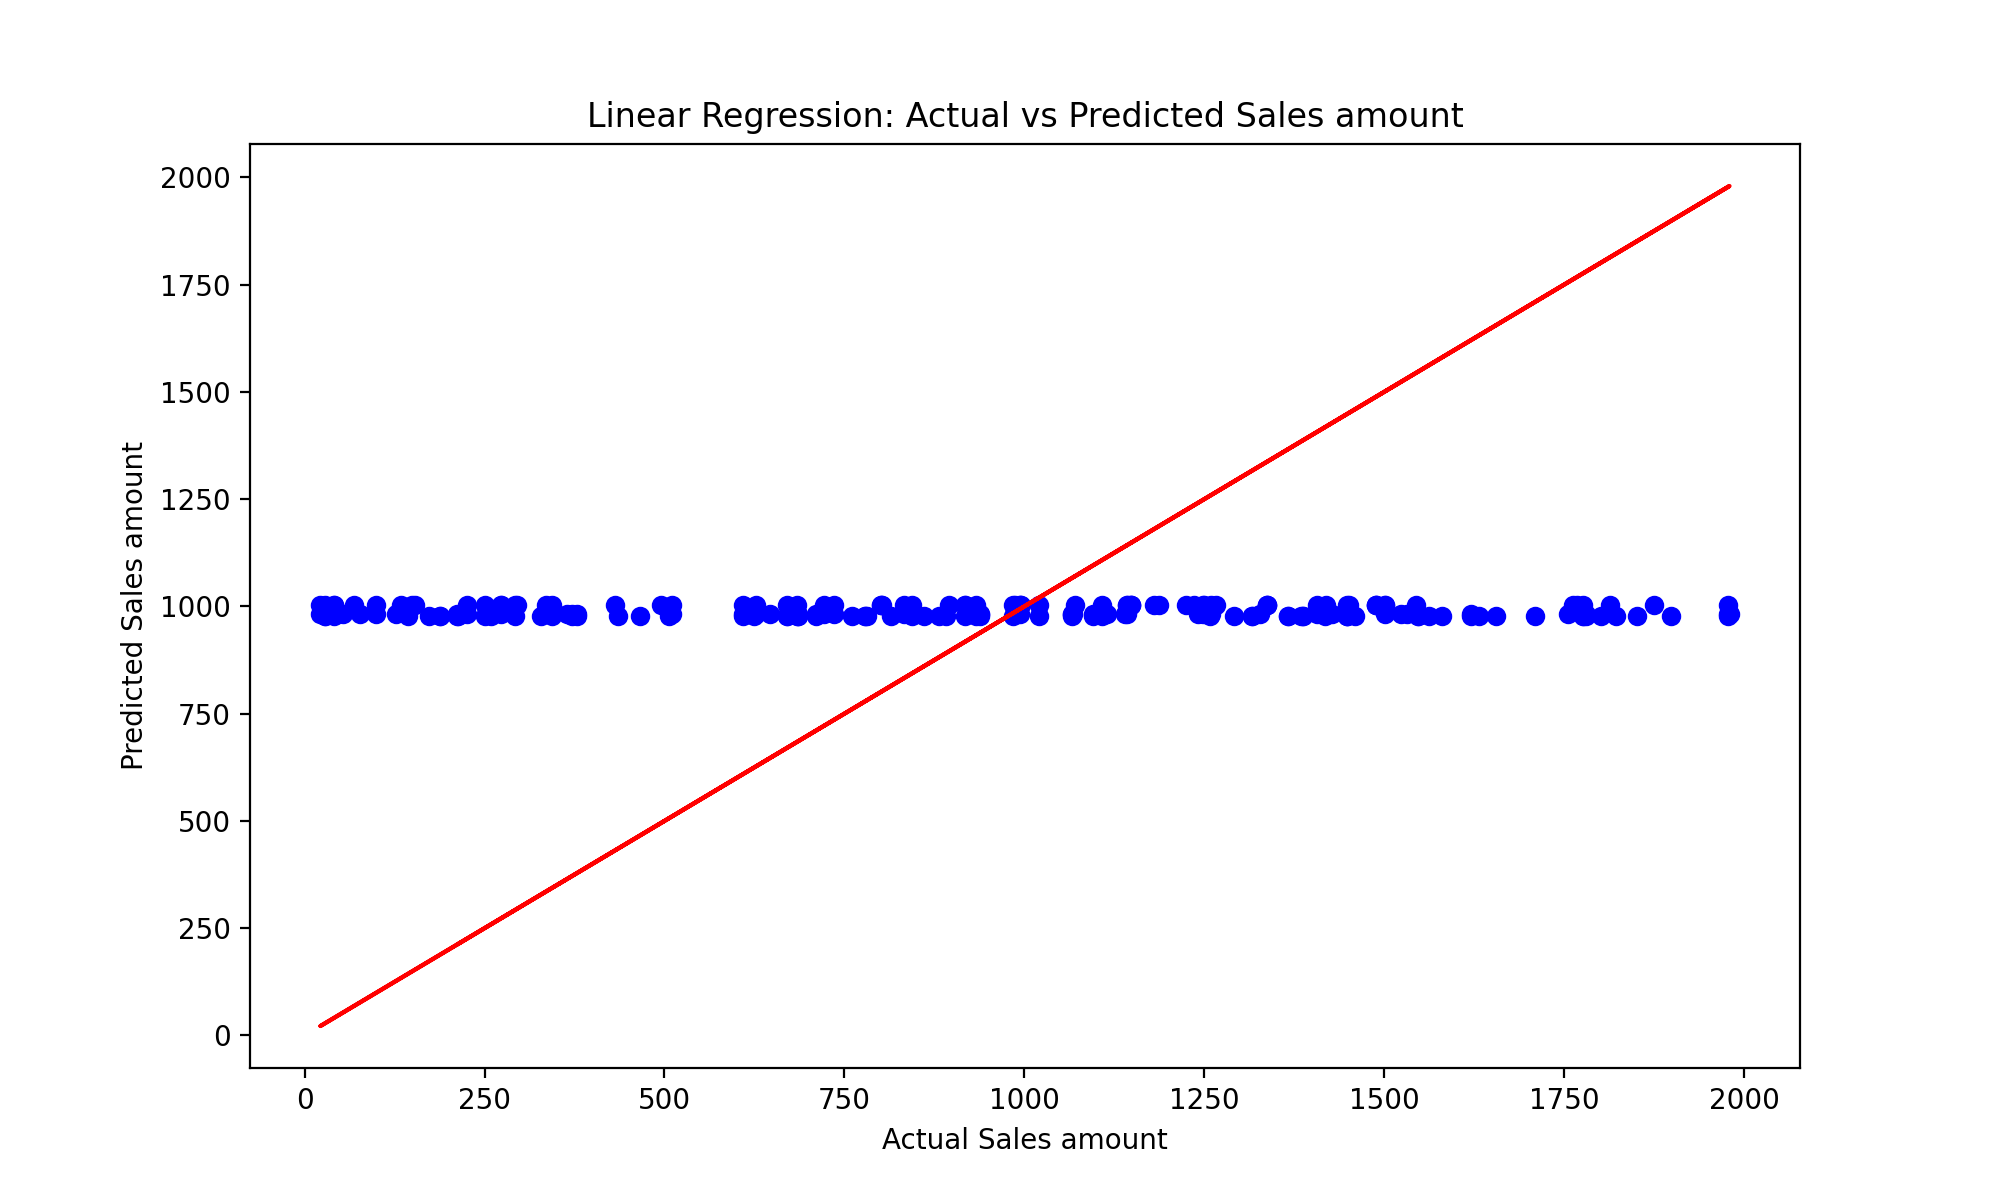

Mean Squared Error: 290949.4431181803, R^2 Score: -0.006031580589628938
Coefficients: [24.80667452  4.4472071 ]
Intercept: 978.7075098814229


In [ ]:
#linear regression product_category
df1_ProductCategory = df1[['SalesAmount', 'ProductCategory']]

df1_ProductCategory = pd.get_dummies(df1_ProductCategory, drop_first=True)
df1_ProductCategory.head()

X = df1_ProductCategory.drop('SalesAmount', axis=1)
y = df1_ProductCategory['SalesAmount']

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

reg.score(train_X, train_y)
#0.0004146583644225599

reg.score(test_X, test_y)
#-0.006031580589628938


from sklearn.metrics import mean_squared_error, r2_score
predictions = reg.predict(test_X)
mse2 = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(test_y, predictions, color='blue')
plt.plot(test_y, test_y, color='red')
plt.xlabel('Actual Sales amount')
plt.ylabel('Predicted Sales amount')
plt.title('Linear Regression: Actual vs Predicted Sales amount')
plt.show()

print(f"Mean Squared Error: {mse2}, R^2 Score: {r2}")
#Mean Squared Error: 290949.4431181803, R^2 Score: -0.006031580589628938

coefficients = reg.coef_
intercept = reg.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

#Coefficients: [24.80667452  4.4472071 ]
#Intercept: 978.7075098814229


Simple linear regression CustomerLocation vs SalesAmount

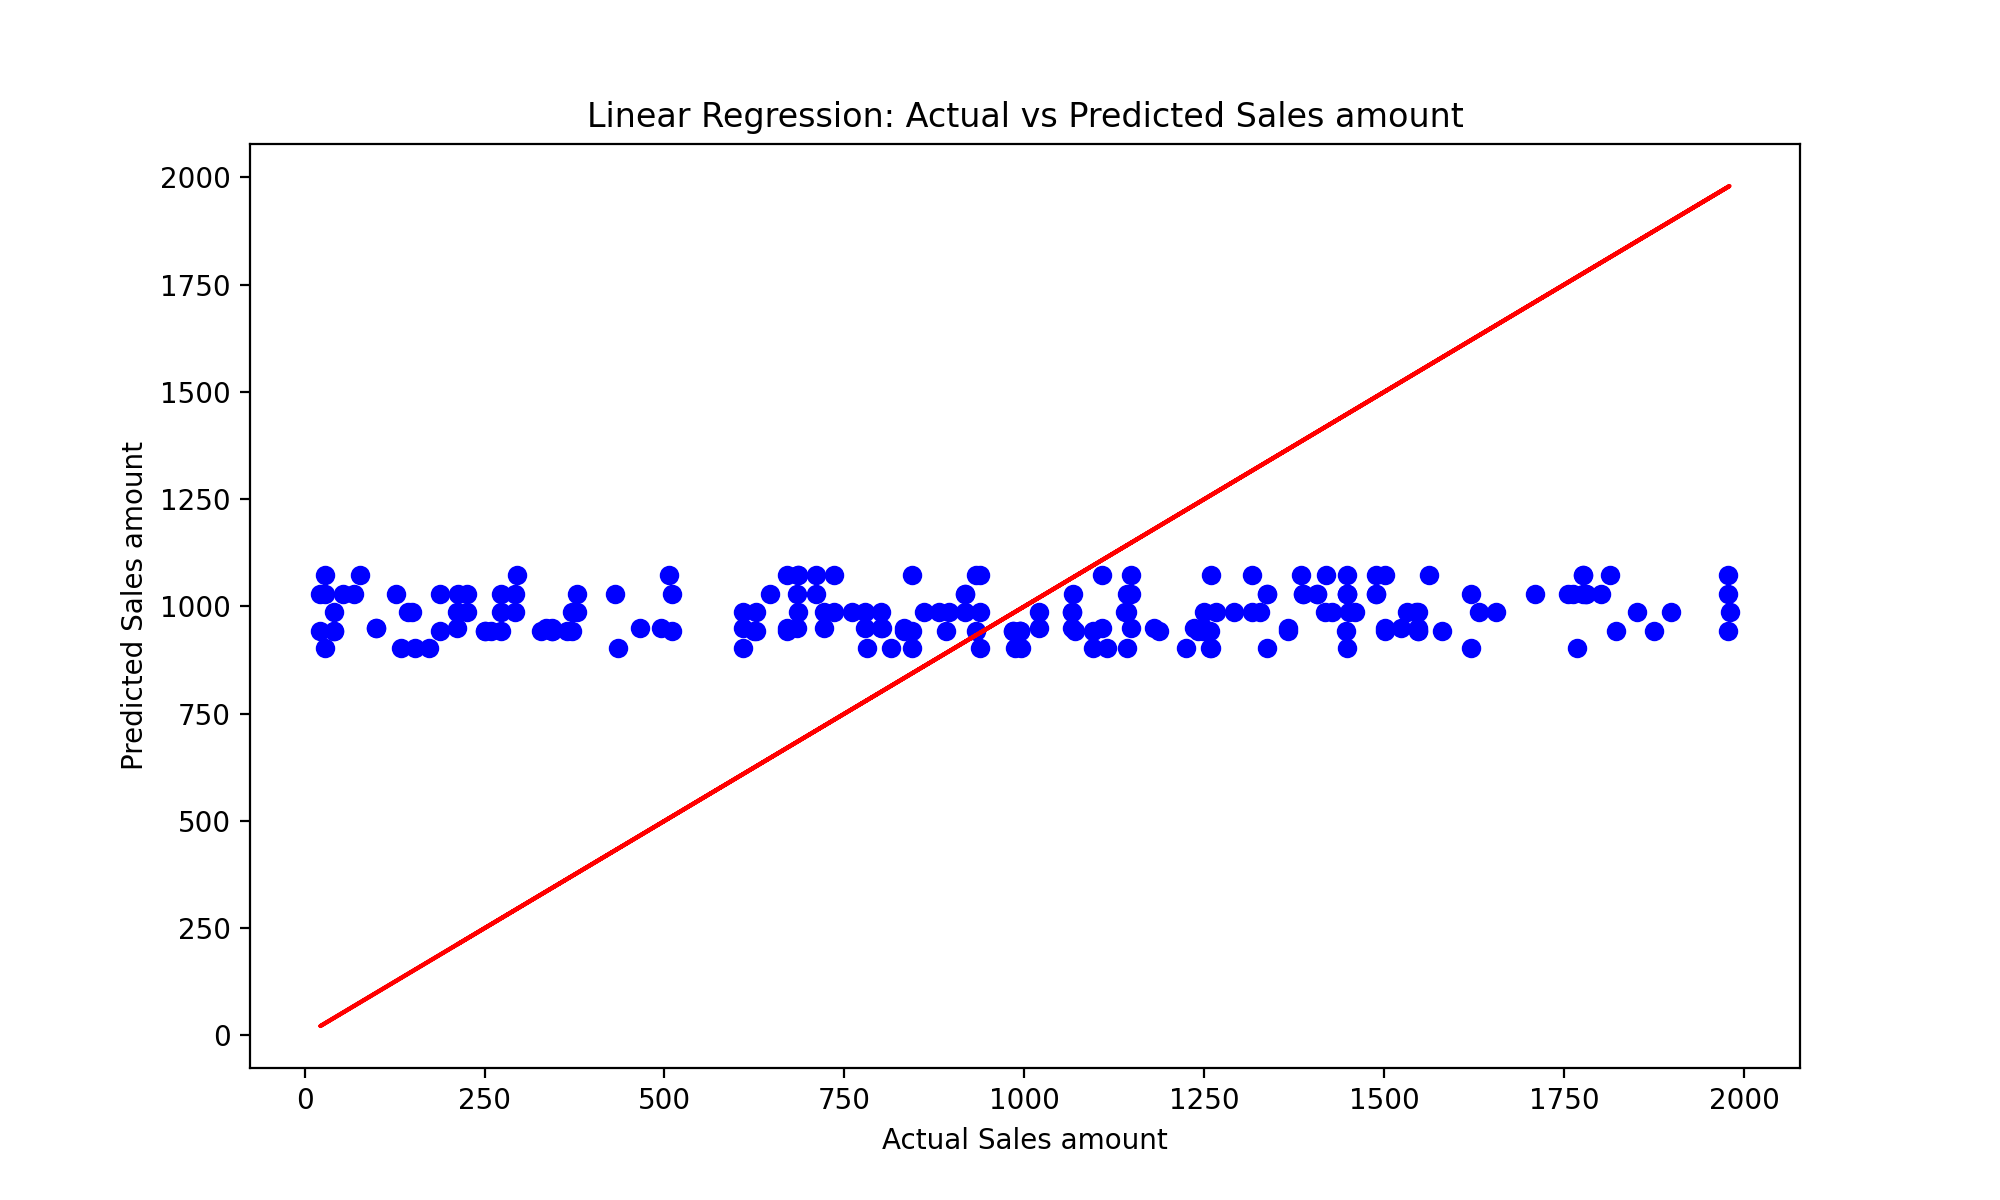

Mean Squared Error: 285514.24982029153, R^2 Score: 0.012761980400498807
Coefficients: [ -6.5183908  123.71777941 -46.55956728  79.88654747  38.66645768]
Intercept: 949.2183908045979


In [ ]:
#linear regression CustomerLocation
df1_CustomerLocation = df1[['SalesAmount', 'CustomerLocation']]

df1_CustomerLocation = pd.get_dummies(df1_CustomerLocation, drop_first=True)
df1_CustomerLocation.head()

X = df1_CustomerLocation.drop('SalesAmount', axis=1)
y = df1_CustomerLocation['SalesAmount']

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)


reg.score(train_X, train_y)
#0.010309993634499581

reg.score(test_X, test_y)
#0.012761980400498807

from sklearn.metrics import mean_squared_error, r2_score
predictions = reg.predict(test_X)
mse2 = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(test_y, predictions, color='blue')
plt.plot(test_y, test_y, color='red')
plt.xlabel('Actual Sales amount')
plt.ylabel('Predicted Sales amount')
plt.title('Linear Regression: Actual vs Predicted Sales amount')
plt.show()

print(f"Mean Squared Error: {mse2}, R^2 Score: {r2}")
#Mean Squared Error: 285514.24982029153, R^2 Score: 0.012761980400498807

coefficients = reg.coef_
intercept = reg.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)
#Coefficients: [ -6.5183908  123.71777941 -46.55956728  79.88654747  38.66645768] #for each region
#Intercept: 949.2183908045981


Simple linear regression ProductRatings vs SalesAmount

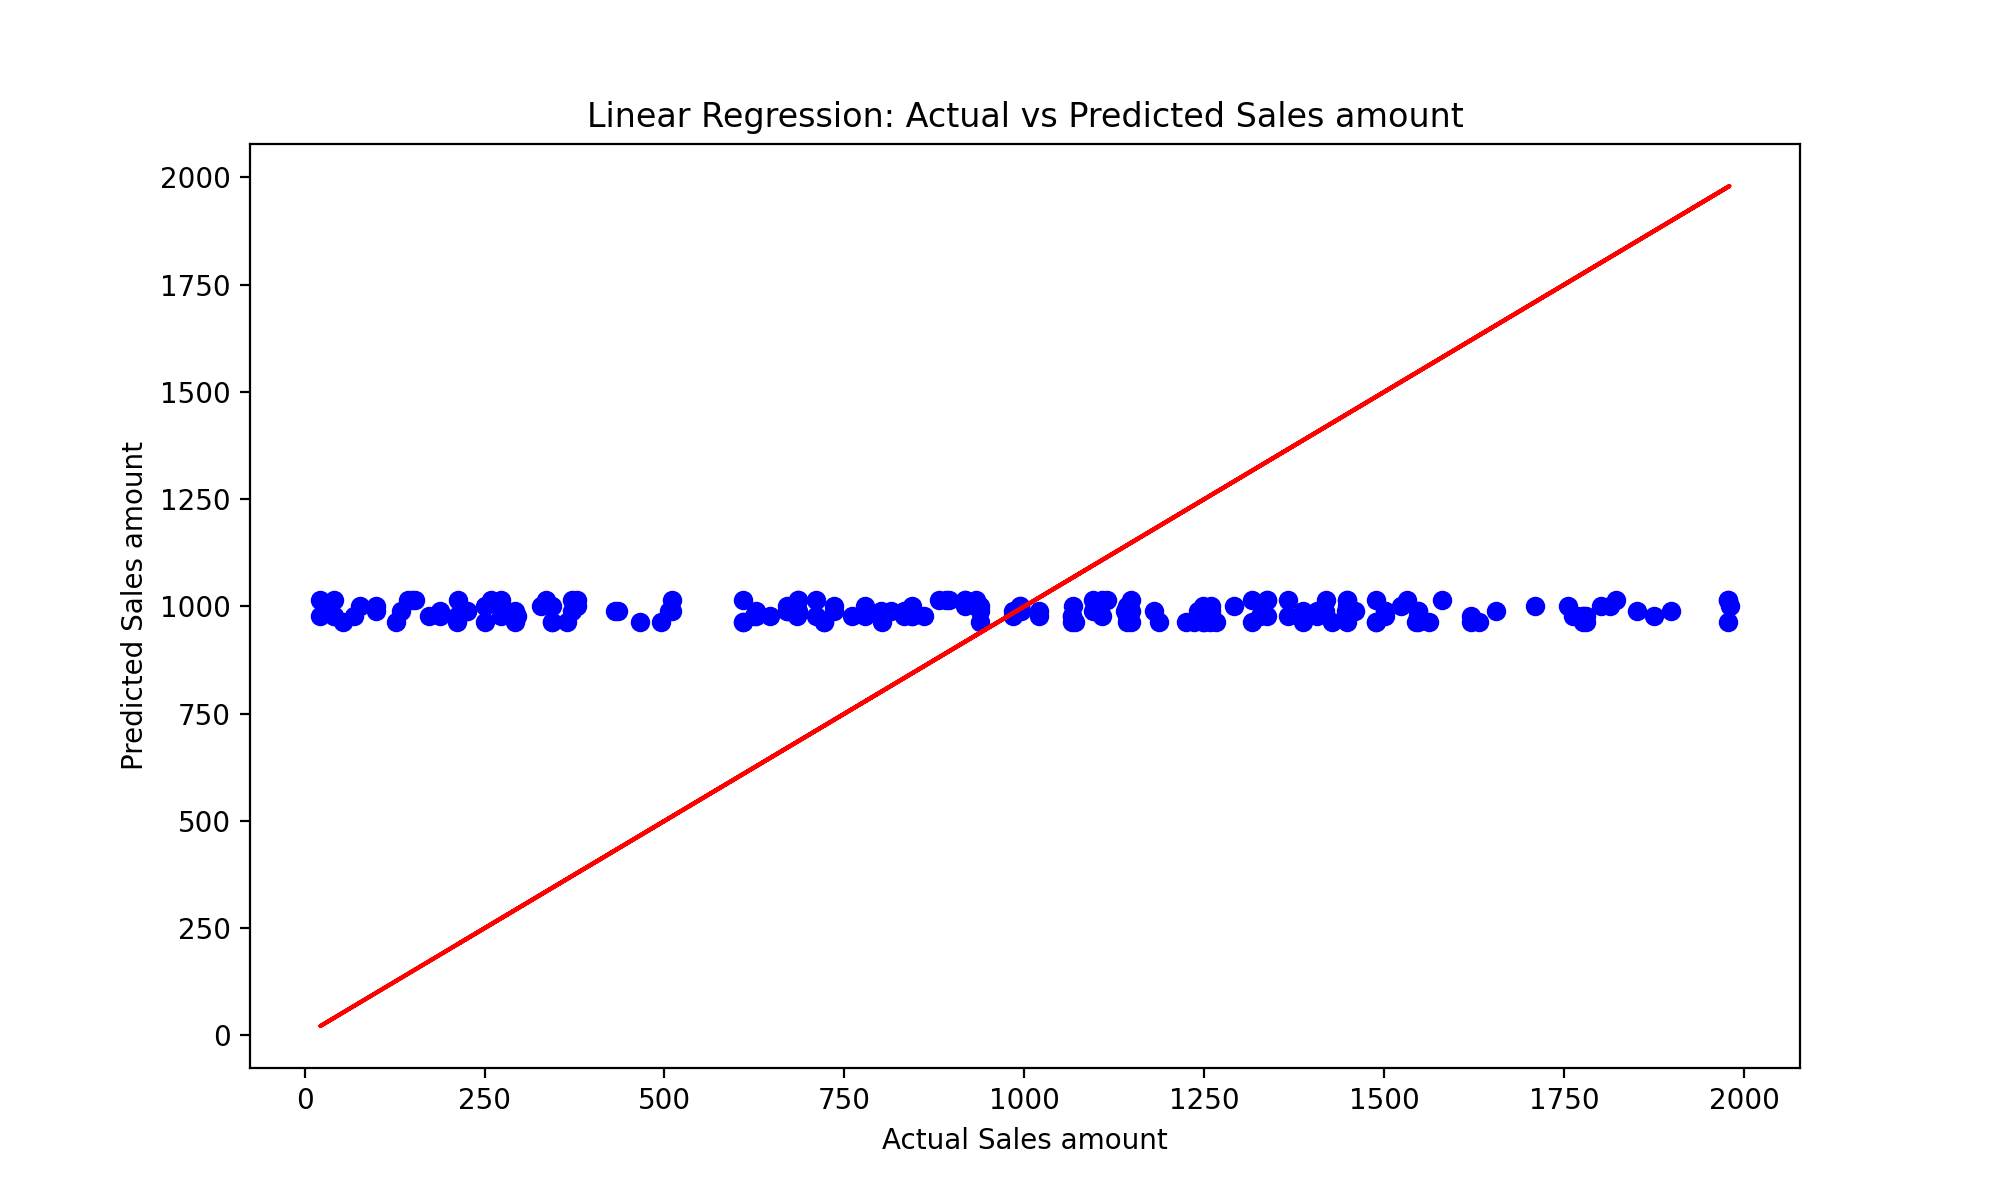

Mean Squared Error: 291976.1597204163, R^2 Score: -0.00958171395677021
Coefficients: [12.60770505]
Intercept: 951.464356363761


In [ ]:
##linear regression ProductRatings
df1_ProductRatings = df1[['SalesAmount', 'ProductRatings']]

df1_ProductRatings.head()

X = df1_ProductRatings.drop('SalesAmount', axis=1)
y = df1_ProductRatings['SalesAmount']

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)


reg.score(train_X, train_y)
#0.001060267949986038

reg.score(test_X, test_y)
#-0.00958171395677021

from sklearn.metrics import mean_squared_error, r2_score
predictions = reg.predict(test_X)
mse2 = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(test_y, predictions, color='blue')
plt.plot(test_y, test_y, color='red')
plt.xlabel('Actual Sales amount')
plt.ylabel('Predicted Sales amount')
plt.title('Linear Regression: Actual vs Predicted Sales amount')
plt.show()

print(f"Mean Squared Error: {mse2}, R^2 Score: {r2}")


coefficients = reg.coef_
intercept = reg.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

#Coefficients: [12.60770505]
#Intercept: 951.4643563637608

Scatter plot of SalesAmount vs all the other variables except SalesDate

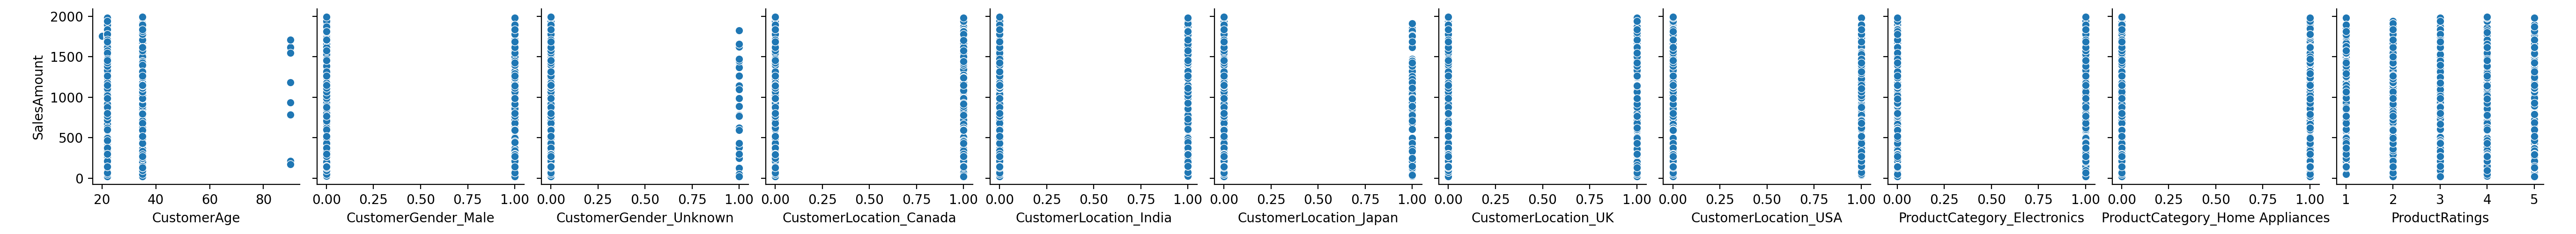

In [ ]:
df1_without_date = df1.drop('SalesDate', axis=1)

# Create dummy variables for categorical columns
df1_with_dummies = pd.get_dummies(df1_without_date, columns=['ProductCategory', 'CustomerGender', 'CustomerLocation'], drop_first=True)

# Identify numeric columns
numeric_columns = df1_with_dummies.select_dtypes(include=['number']).columns

# Select the variable for the y-axis
y_variable = 'SalesAmount'

# Create pair plots for 'SalesAmount' against other numeric variables
sns.pairplot(df1_with_dummies, y_vars=[y_variable], x_vars=numeric_columns.difference([y_variable]))
plt.show()

Multiple linear regression model SalesAmount vs all the other variables except SalesDate

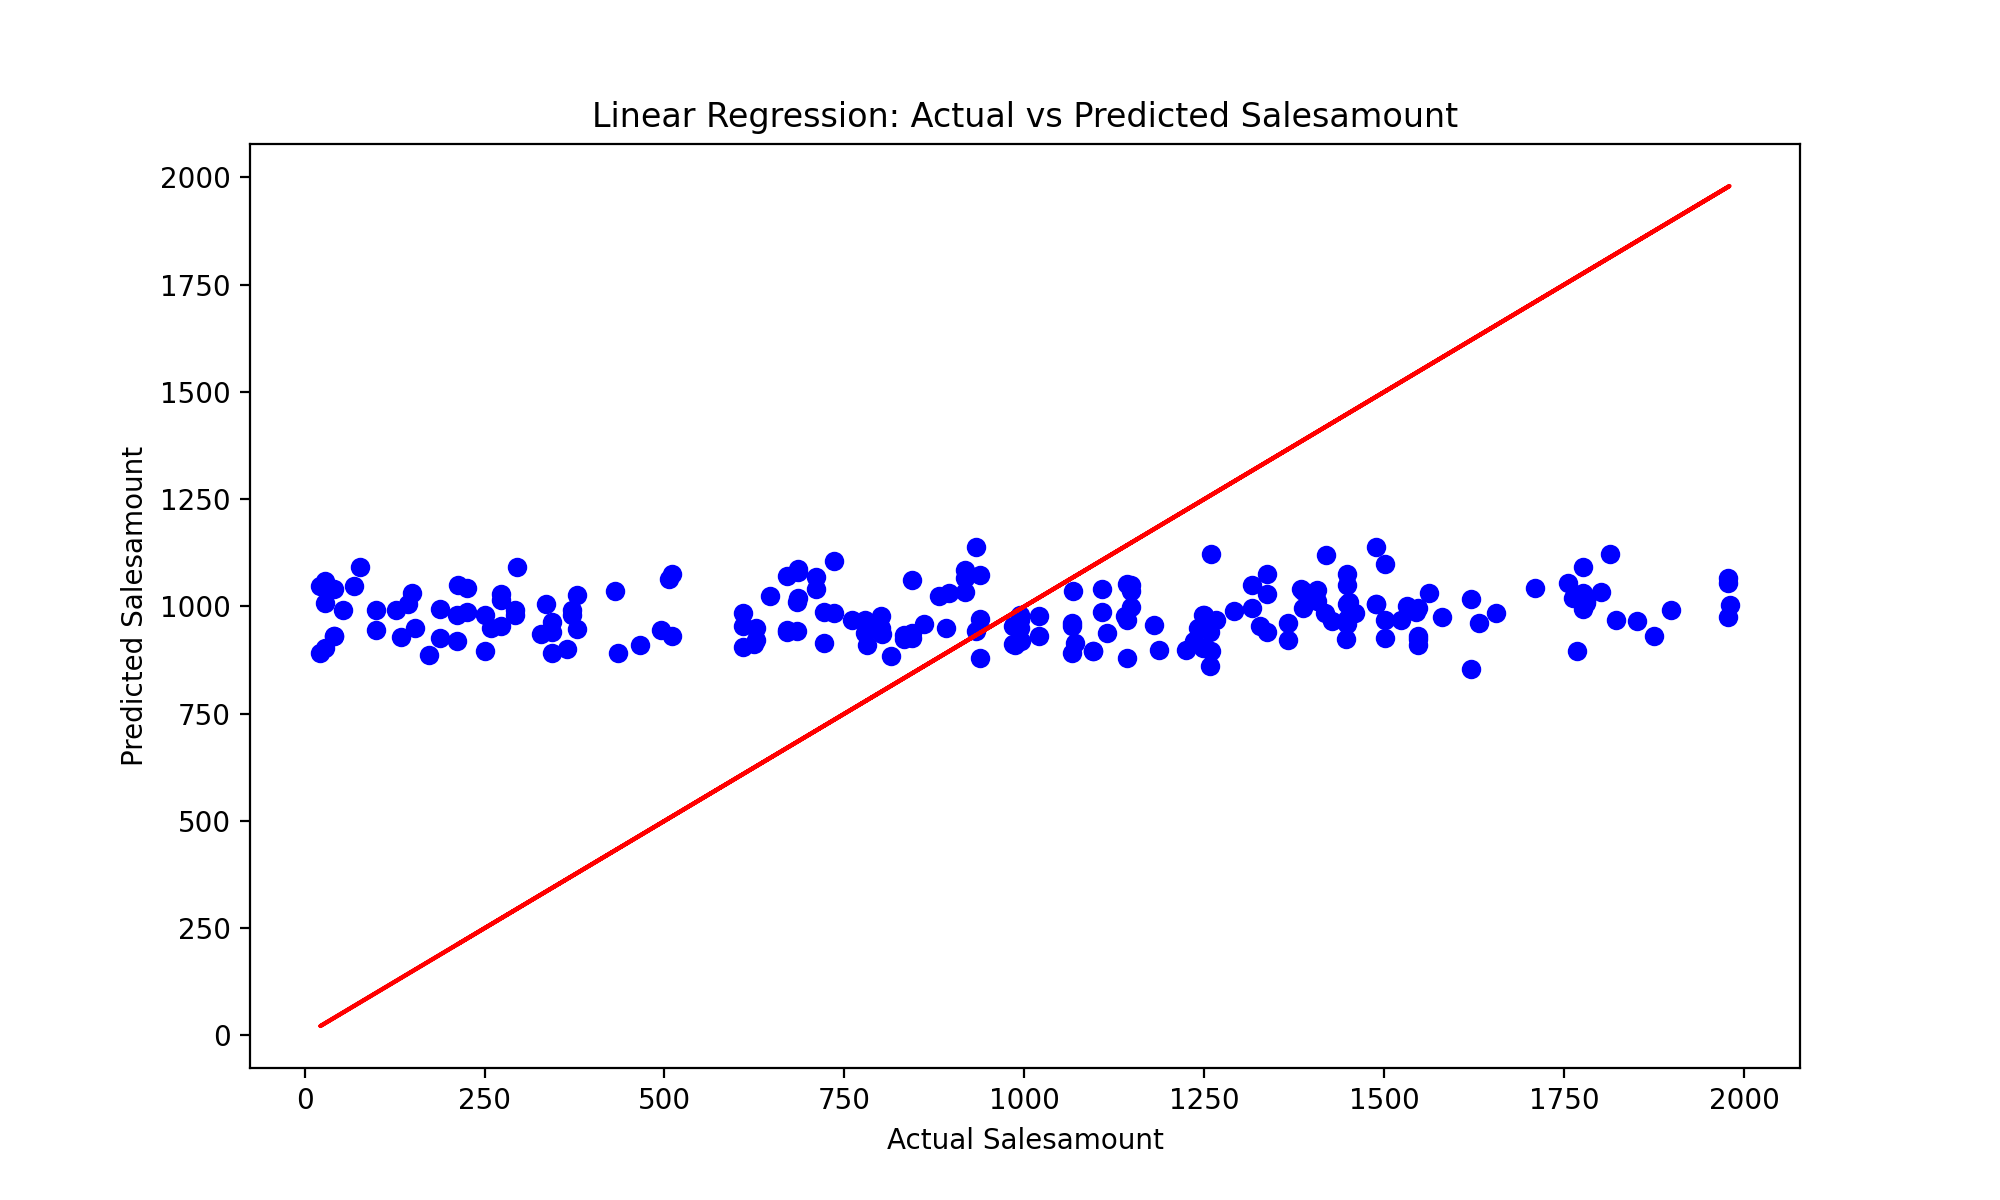

Mean Squared Error: 286525.66188462137, R^2 Score: 0.009264766359460497
Coefficients: [ -0.60531778  15.42545164  25.93355774   3.49284111  17.99614216
 -62.14330645  -3.81386546 131.93118593 -38.60478453  86.9344306
  43.24619923]
Intercept: 898.2287486645464


In [ ]:
#multiple linear regression
df1_multiple = df1.drop(['SalesDate', 'QuarterSales'], axis=1)
df1_multiple = pd.get_dummies(df1_multiple, drop_first=True)
df1_multiple.head()

X = df1_multiple.drop('SalesAmount', axis=1)
y = df1_multiple['SalesAmount']

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)


reg.score(train_X, train_y)
#0.01513520908061139

reg.score(test_X, test_y)
#0.012248609770382335

from sklearn.metrics import mean_squared_error, r2_score
predictions = reg.predict(test_X)
mse2 = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(test_y, predictions, color='blue')
plt.plot(test_y, test_y, color='red')
plt.xlabel('Actual Salesamount')
plt.ylabel('Predicted Salesamount')
plt.title('Linear Regression: Actual vs Predicted Salesamount')
plt.show()

print(f"Mean Squared Error: {mse2}, R^2 Score: {r2}")
#Mean Squared Error: 285662.7192141232, R^2 Score: 0.012248609770382335

coefficients = reg.coef_
intercept = reg.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Random Forest model to Predict SalesAmount using all the variable except SalesDate it takes 4-5 minutes to run

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


df1_rf = df1.drop(['SalesDate', 'QuarterSales'], axis=1)
df1_rf = pd.get_dummies(df1_rf, drop_first=True)

X = df1_rf.drop('SalesAmount', axis=1)
y = df1_rf['SalesAmount']

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

# Find the optimal number of trees
min_mse = float('inf')
best_n_estimators = 0

for n_estimators in range(1, 501):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=123)
    rf.fit(train_X, train_y)
    y_pred = rf.predict(test_X)
    mse = mean_squared_error(test_y, y_pred)

    if mse < min_mse:
        min_mse = mse
        best_n_estimators = n_estimators

# Print the best number of trees
print(f"Best number of trees: {best_n_estimators}")

# Train the final model with the best number of trees
rf_final = RandomForestRegressor(n_estimators=best_n_estimators, random_state=123)
rf_final.fit(train_X, train_y)

# Make predictions on the testing data
pred_y = rf_final.predict(test_X)

# Evaluate the final model
mae_final = mean_absolute_error(test_y, pred_y)
print(f"Mean Absolute Error on the test set with the final model: {mae_final}")


Best number of trees: 28
Mean Absolute Error on the test set with the final model: 457.49993268140594


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


# Initialize and train the ExtraTrees classifier
extremely_rts = ExtraTreesClassifier()
extremely_rts.fit(X, y)

# Estimate feature importances
importances = extremely_rts.feature_importances_

# Get indices to sort feature importances
indices = np.argsort(importances)[::-1]

# Print feature importances
print("Feature importances:")
for i in indices:
    print(X.columns[i], importances[i])


Feature importances:
ProductRatings 0.38398083550842554
CustomerAge 0.1882982042642801
ProductCategory_Home Appliances 0.0796875616377379
CustomerGender_Male 0.06260911375826601
CustomerLocation_USA 0.058437053404211584
CustomerLocation_Canada 0.042699259188165
CustomerLocation_India 0.04234621884712622
ProductCategory_Electronics 0.04234499605659169
CustomerLocation_Japan 0.03829492487264571
CustomerLocation_UK 0.03147030010492388
CustomerGender_Unknown 0.02983153235762639


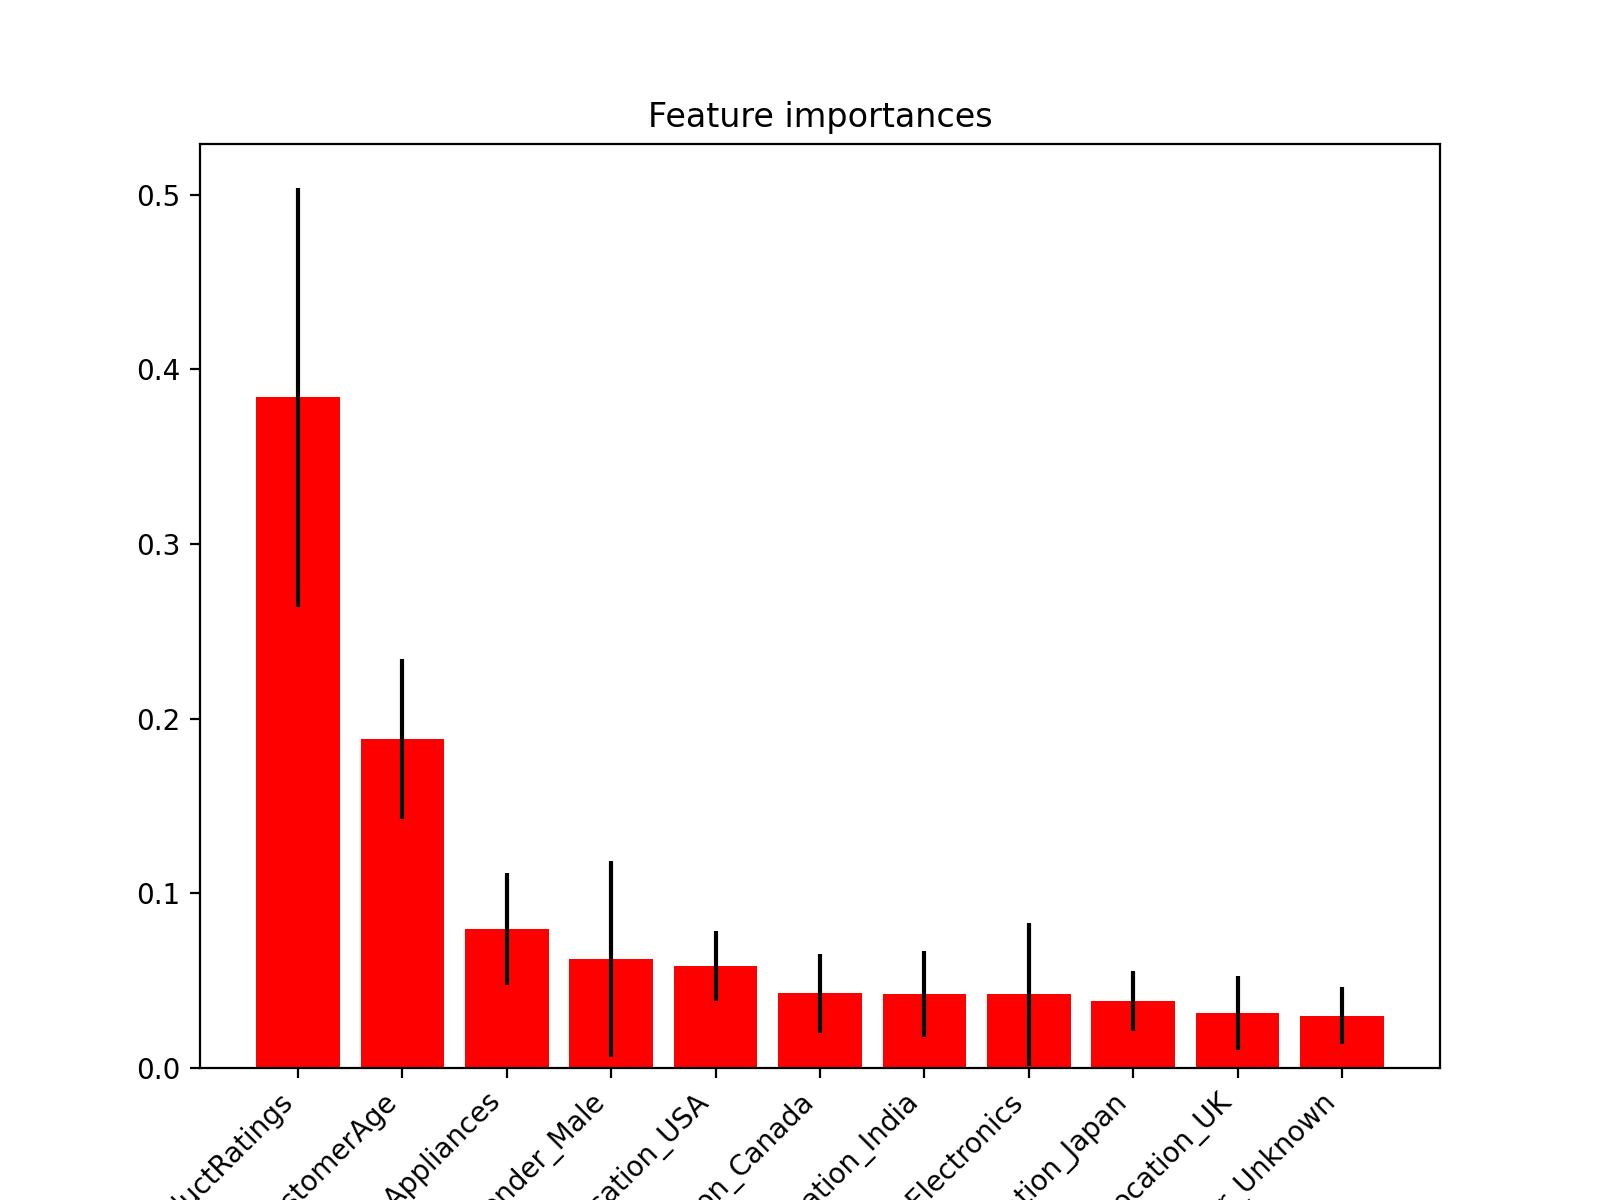

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Feature importances")
plt.bar(range(len(X.columns)), importances[indices],
        tick_label=[X.columns[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(rotation=45, ha="right")
plt.show()

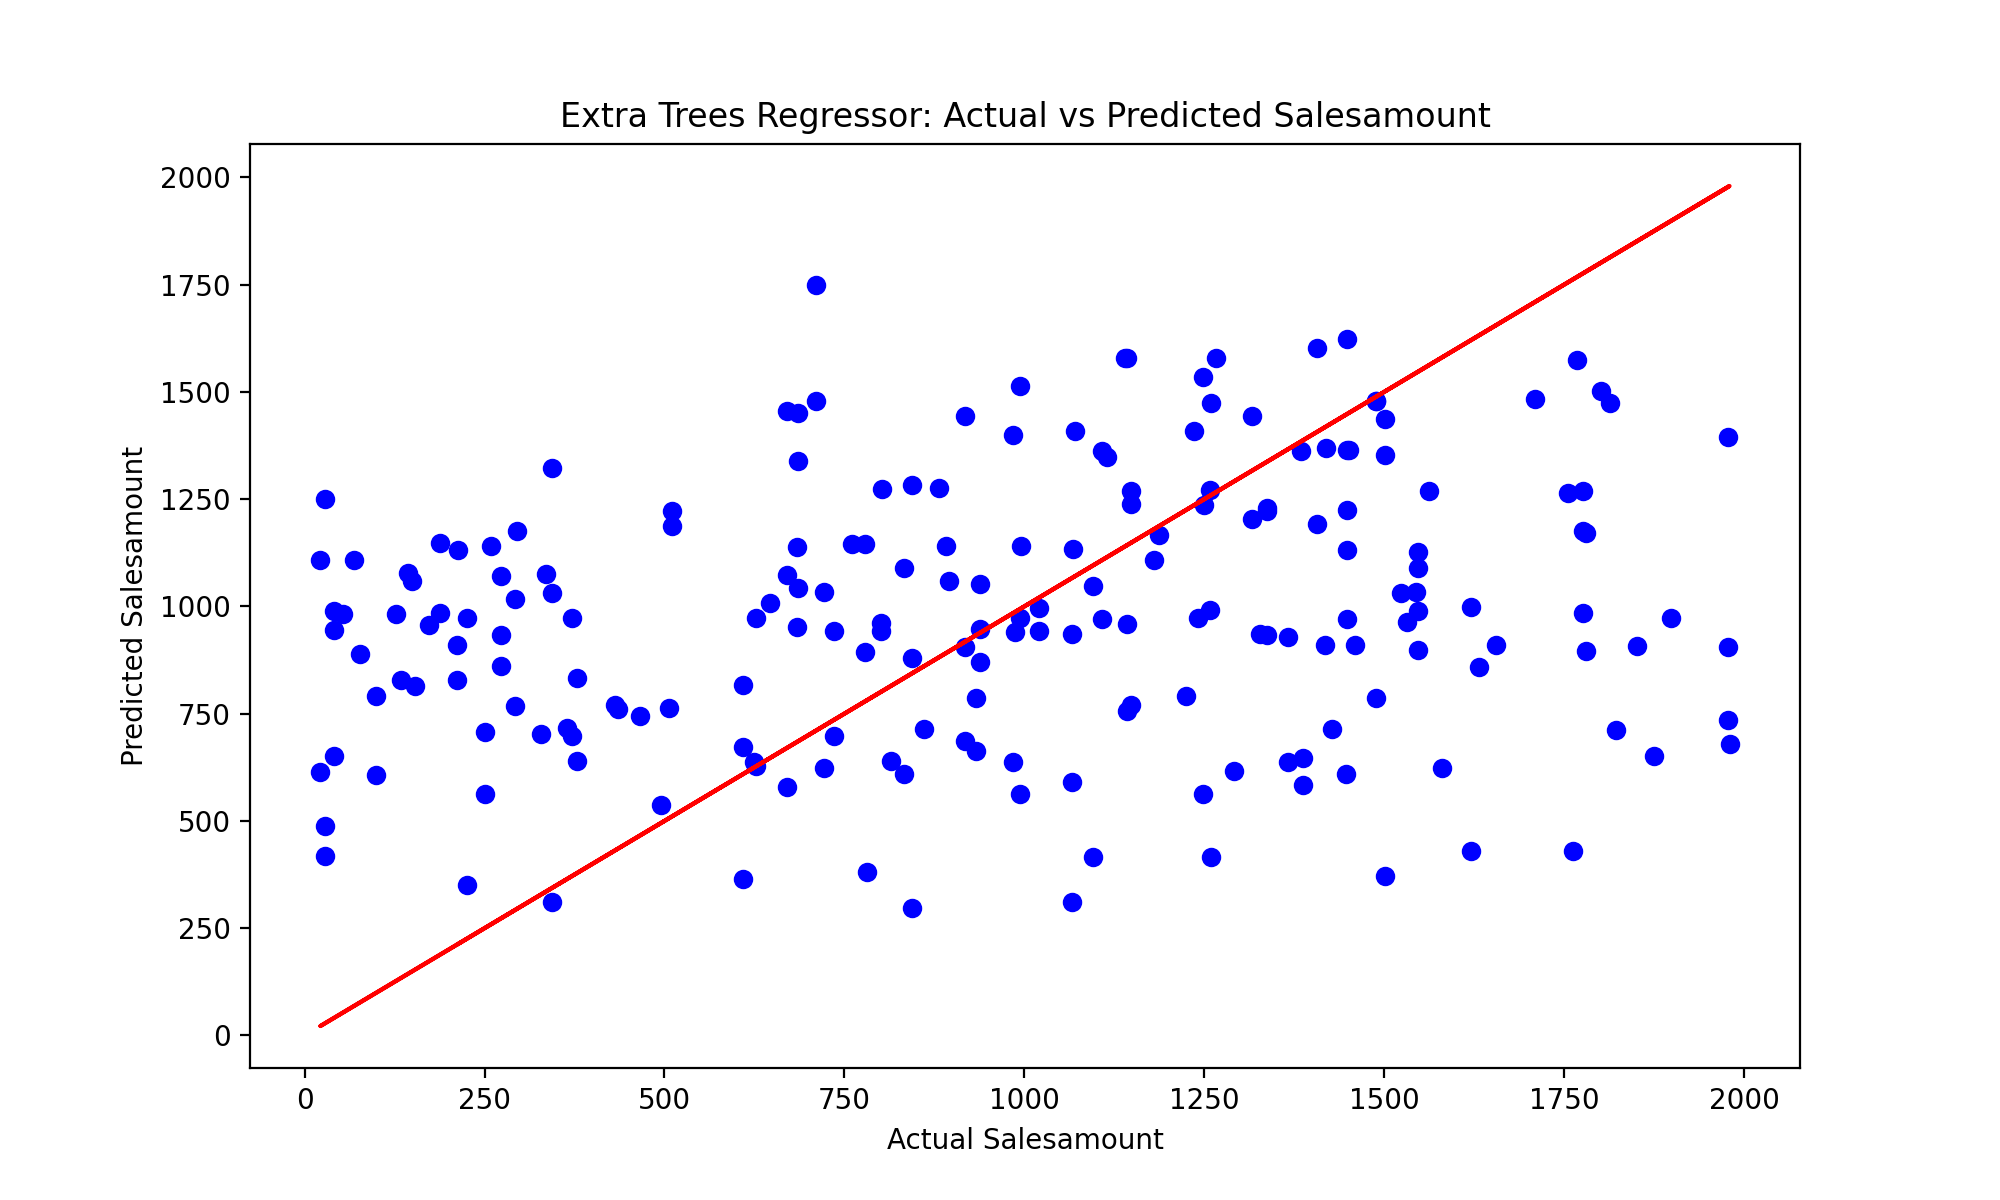

In [ ]:
actual_y = test_y
predicted_y = pred_y

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(actual_y, predicted_y, color='blue')
plt.plot(actual_y, actual_y, color='red')
plt.xlabel('Actual Salesamount')
plt.ylabel('Predicted Salesamount')
plt.title('Extra Trees Regressor: Actual vs Predicted Salesamount')
plt.show()

K-Means Clustering

k-means using two variables

In [ ]:
#K-Means Clustering using two variables
from sklearn.cluster import KMeans
import pandas as p
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline



In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(df1[['SalesAmount']])
df1['SalesAmount'] = scaler.transform(df1[['SalesAmount']])

scaler.fit(df1[['ProductRatings']])
df1['ProductRatings'] = scaler.transform(df1[['ProductRatings']])

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['SalesAmount','ProductRatings']])
    sse.append(km.inertia_)

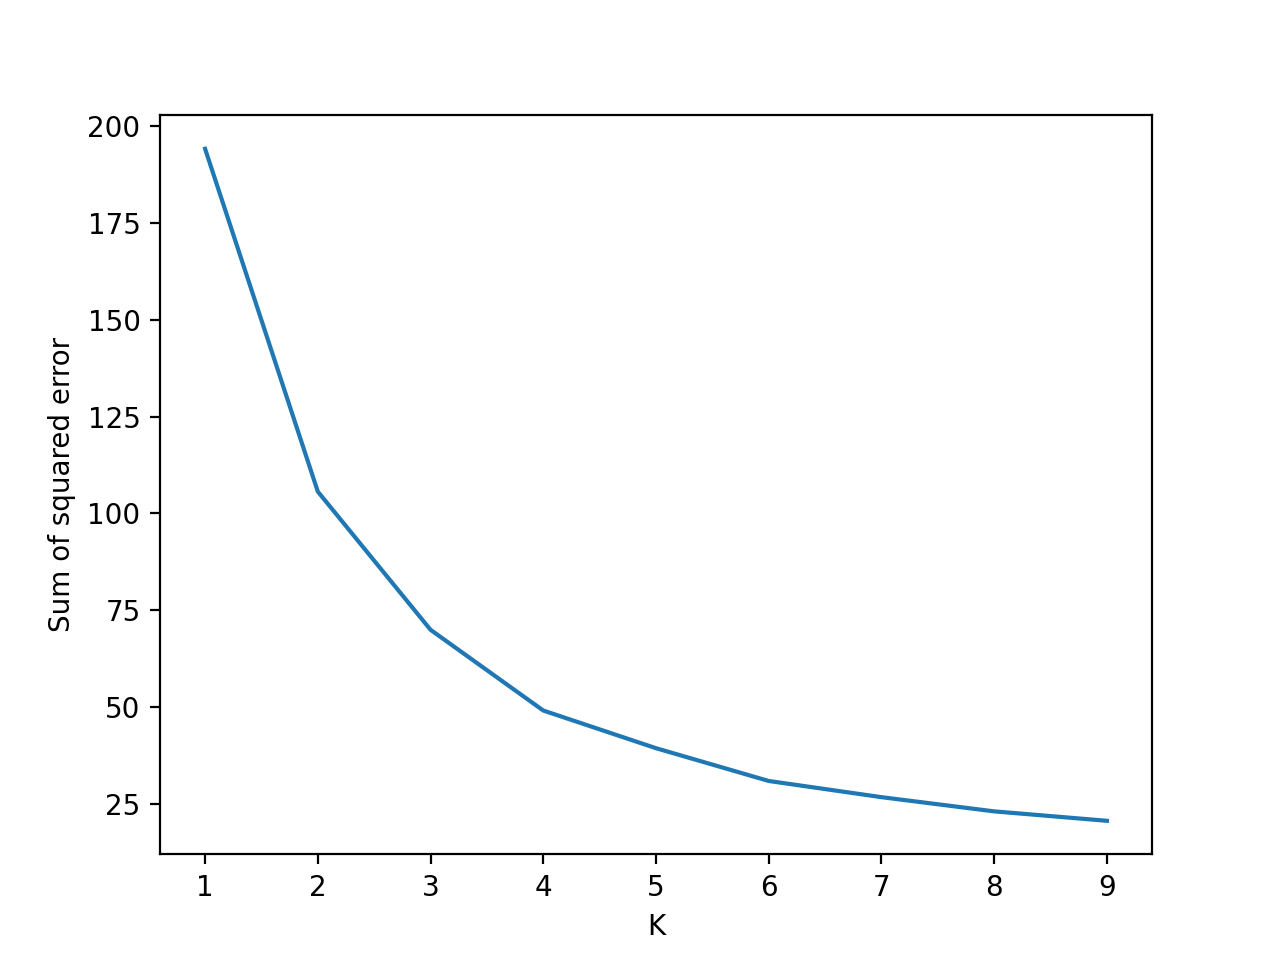

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
#elbow in 4 clusters

In [ ]:
km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(df1[['SalesAmount','ProductRatings']])
y_predicted

In [ ]:
df1['cluster']=y_predicted
df1.head()

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,QuarterSales,cluster
0,2023-10-15,Home Appliances,0.297667,22,Male,USA,0.75,2023Q4,4
1,2023-09-16,Clothing,0.682049,22,Female,Australia,1.00,2023Q3,0
2,2022-09-06,Electronics,0.869168,22,Male,UK,0.25,2022Q3,3
3,2023-02-24,Clothing,0.920892,35,Female,India,0.25,2023Q1,3
4,2022-09-24,Home Appliances,0.916329,35,Male,UK,1.00,2022Q3,0


In [ ]:
km.cluster_centers_

array([[ 7.09174715e-01,  8.76865672e-01],
       [ 7.14478895e-01, -5.55111512e-16],
       [ 2.54382788e-01,  5.00000000e-01],
       [ 7.36870027e-01,  3.73076923e-01],
       [ 2.53823646e-01,  8.70689655e-01],
       [ 2.48481250e-01,  1.35678392e-01]])

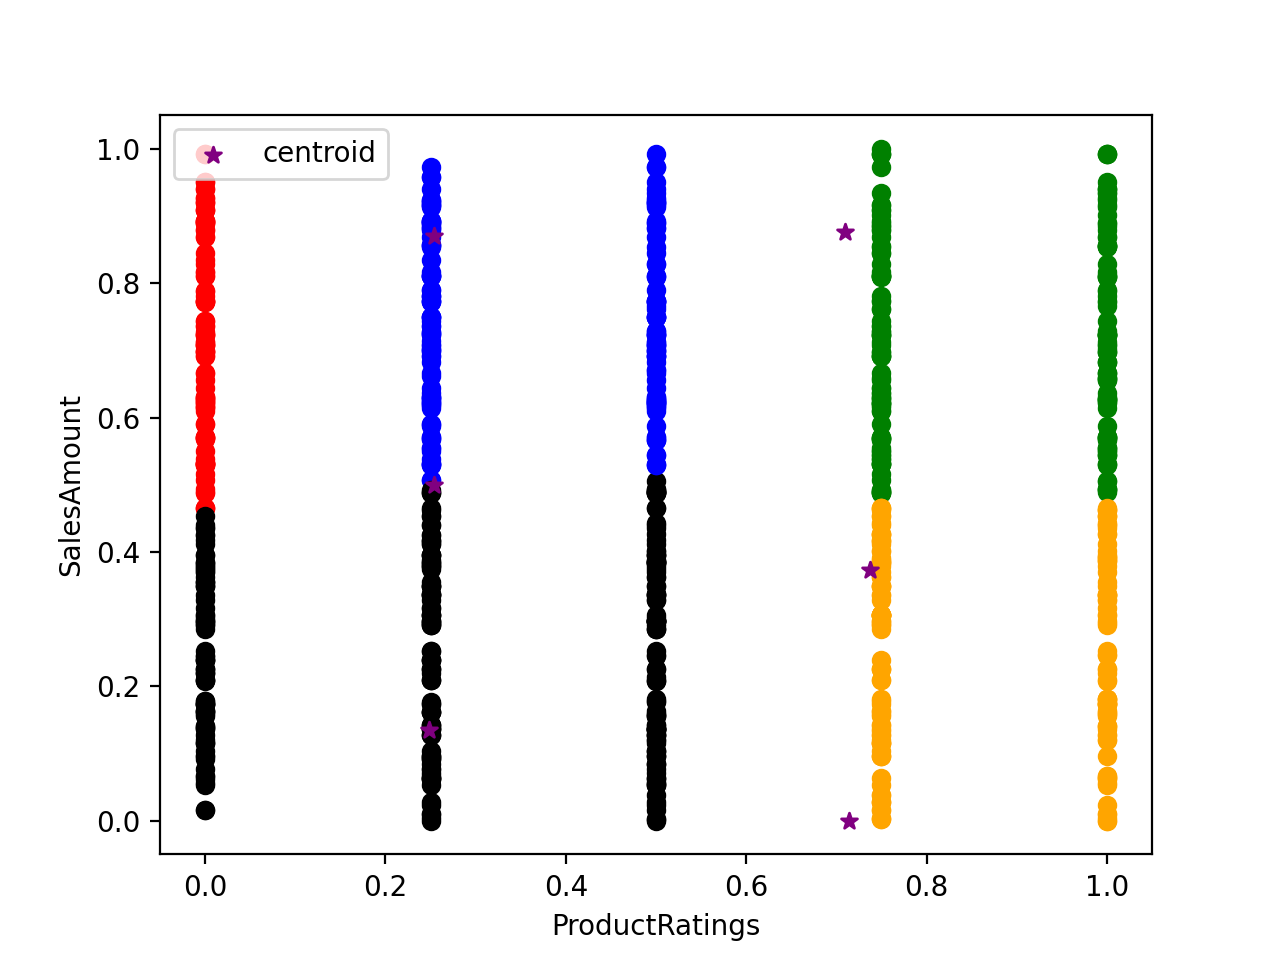

In [ ]:
df11 = df1[df1.cluster==0]
df12 = df1[df1.cluster==1]
df13 = df1[df1.cluster==2]
df14 = df1[df1.cluster==3]
df15 = df1[df1.cluster==4]
df16 = df1[df1.cluster==5]

plt.scatter(df11.ProductRatings,df11['SalesAmount'],color='green')
plt.scatter(df12.ProductRatings,df12['SalesAmount'],color='red')
plt.scatter(df13.ProductRatings,df13['SalesAmount'],color='black')
plt.scatter(df14.ProductRatings,df14['SalesAmount'],color='blue')
plt.scatter(df15.ProductRatings,df15['SalesAmount'],color='orange')
plt.scatter(df16.ProductRatings,df16['SalesAmount'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('ProductRatings')
plt.ylabel('SalesAmount')
plt.legend()

K-means using all variables except SalesDate

In [ ]:
#k-means clustering for all variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df1_multiple)
df1_multiple_scaled = pd.DataFrame(X, index=df1_multiple.index,
                             columns=df1_multiple.columns)

In [ ]:
df1_multiple_scaled.head()

,SalesAmount,CustomerAge,ProductRatings,ProductCategory_Electronics,ProductCategory_Home Appliances,CustomerGender_Male,CustomerGender_Unknown,CustomerLocation_Canada,CustomerLocation_India,CustomerLocation_Japan,CustomerLocation_UK,CustomerLocation_USA
0,-0.695731,-0.791323,0.748614,-0.745124,1.471243,1.024295,-0.169725,-0.501562,-0.447750,-0.346151,-0.504683,1.945428
1,0.717337,-0.791323,1.469822,-0.745124,-0.679697,-0.976281,-0.169725,-0.501562,-0.447750,-0.346151,-0.504683,-0.514026
2,1.405228,-0.791323,-0.693802,1.342058,-0.679697,1.024295,-0.169725,-0.501562,-0.447750,-0.346151,1.981441,-0.514026
3,1.595377,0.701956,-0.693802,-0.745124,-0.679697,-0.976281,-0.169725,-0.501562,2.233388,-0.346151,-0.504683,-0.514026
4,1.578600,0.701956,1.469822,-0.745124,1.471243,1.024295,-0.169725,-0.501562,-0.447750,-0.346151,1.981441,-0.514026


In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

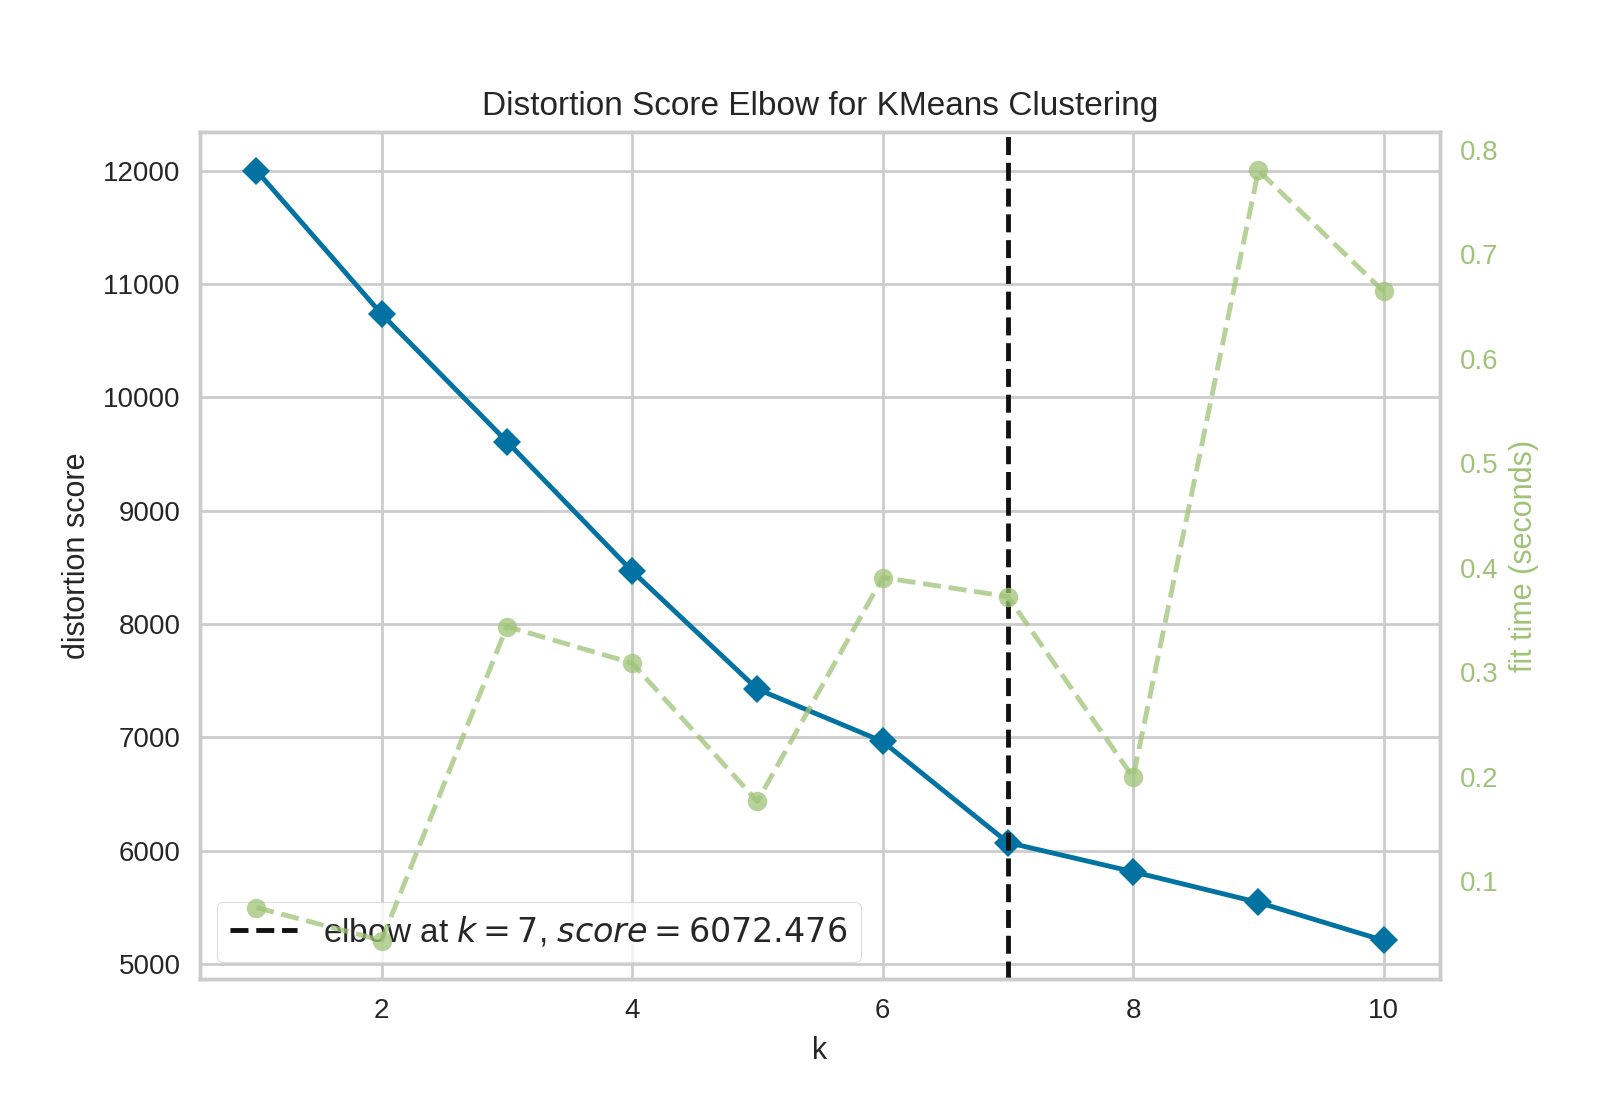

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1, 11))

visualizer.fit(df1_multiple_scaled)
visualizer.show()

we will create 7 clusters

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(df1_multiple_scaled)
kmeans.cluster_centers_

array([[-9.91850288e-02, -1.24680657e-01, -3.69876645e-02,
         1.12111512e-01, -1.41962077e-01,  2.20492082e-01,
        -1.69725026e-01, -5.01562016e-01, -4.47750145e-01,
        -3.46151453e-01, -5.04683212e-01, -5.14025781e-01],
       [-9.52271781e-02,  7.22458770e-02,  7.54864313e-02,
        -1.72861517e-02,  5.93438984e-02,  4.96553284e-02,
        -1.69725026e-01,  1.99377140e+00, -4.47750145e-01,
        -3.46151453e-01, -5.04683212e-01, -5.14025781e-01],
       [ 1.78124048e-01, -5.63112351e-02, -9.20579905e-02,
         1.03590832e-02, -7.26833164e-02, -6.80441394e-02,
        -1.69725026e-01, -5.01562016e-01,  2.23338845e+00,
        -3.46151453e-01, -5.04683212e-01, -5.14025781e-01],
       [-1.37311607e-01,  1.60638026e-02, -5.58103992e-02,
        -2.26379015e-02,  2.81276842e-03,  4.77060490e-03,
        -1.69725026e-01, -5.01562016e-01, -4.47750145e-01,
         2.88890886e+00, -5.04683212e-01, -5.14025781e-01],
       [ 2.93801959e-02, -3.18252038e-02,  4.1758298

In [ ]:
df1_multiple_scaled['cluster']=kmeans.labels_
df1_multiple_scaled.head()

,SalesAmount,CustomerAge,ProductRatings,ProductCategory_Electronics,ProductCategory_Home Appliances,CustomerGender_Male,CustomerGender_Unknown,CustomerLocation_Canada,CustomerLocation_India,CustomerLocation_Japan,CustomerLocation_UK,CustomerLocation_USA,cluster
0,-0.695731,-0.791323,0.748614,-0.745124,1.471243,1.024295,-0.169725,-0.501562,-0.447750,-0.346151,-0.504683,1.945428,4
1,0.717337,-0.791323,1.469822,-0.745124,-0.679697,-0.976281,-0.169725,-0.501562,-0.447750,-0.346151,-0.504683,-0.514026,0
2,1.405228,-0.791323,-0.693802,1.342058,-0.679697,1.024295,-0.169725,-0.501562,-0.447750,-0.346151,1.981441,-0.514026,5
3,1.595377,0.701956,-0.693802,-0.745124,-0.679697,-0.976281,-0.169725,-0.501562,2.233388,-0.346151,-0.504683,-0.514026,2
4,1.578600,0.701956,1.469822,-0.745124,1.471243,1.024295,-0.169725,-0.501562,-0.447750,-0.346151,1.981441,-0.514026,5


In [ ]:
kmeans.labels_[:10]

array([4, 0, 5, 2, 5, 0, 4, 4, 1, 5], dtype=int32)

In [ ]:
print(df1_multiple_scaled['cluster'].head(10))


0    4
1    0
2    5
3    2
4    5
5    0
6    4
7    4
8    1
9    5
Name: cluster, dtype: int32


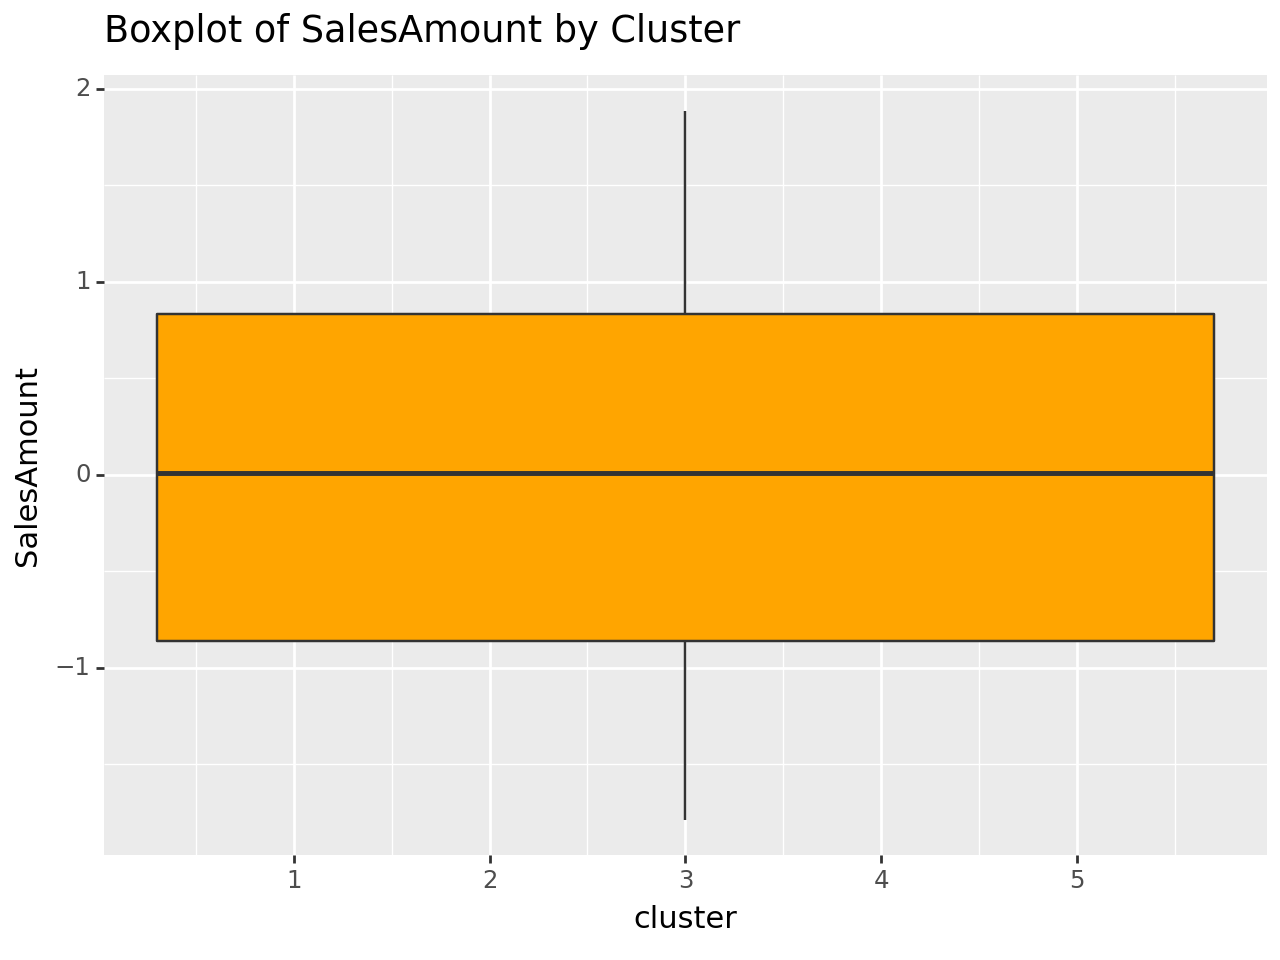

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_boxplot

# Create the boxplot
(ggplot(df1_multiple_scaled, aes(x='cluster', y='SalesAmount')) +
 geom_boxplot(fill='orange', outlier_color='orange', outlier_size=2, width=0.15) +
 labs(title='Boxplot of SalesAmount by Cluster'))
